In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mobile_prices_2023_csv_df = pd.read_csv("C:\\Users\\kalya\\Downloads\\mobile_prices_2023.csv")

- loading the dataset

In [54]:
mobile_prices_2023_csv_df.shape

(1836, 11)

- Shape of the dataset(rows,column)

In [55]:
mobile_prices_2023_csv_df.head()

Phone Name  Rating ?/5 Number of Ratings       RAM  \
0   POCO C50 (Royal Blue, 32 GB)         4.2            33,561  2 GB RAM   
1  POCO M4 5G (Cool Blue, 64 GB)         4.2            77,128  4 GB RAM   
2   POCO C51 (Royal Blue, 64 GB)         4.3            15,175  4 GB RAM   
3    POCO C55 (Cool Blue, 64 GB)         4.2            22,621  4 GB RAM   
4  POCO C51 (Power Black, 64 GB)         4.3            15,175  4 GB RAM   

  ROM/Storage       Back/Rare Camera      Front Camera   Battery  \
0   32 GB ROM        8MP Dual Camera  5MP Front Camera  5000 mAh   
1   64 GB ROM             50MP + 2MP  8MP Front Camera  5000 mAh   
2   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3   64 GB ROM  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                                           Processor Price in INR  \
0  Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...       ₹5,649   
1                   Mediatek Dimensity 700 Processor      ₹11,999   
2                                Helio G36 Processor       ₹6,999   
3                       Mediatek Helio G85 Processor       ₹7,749   
4                                Helio G36 Processor       ₹6,999   

  Date of Scraping  
0       2023-06-17  
1       2023-06-17  
2       2023-06-17  
3       2023-06-17  
4       2023-06-17

- top 5 rows of dataset


In [56]:
mobile_prices_2023_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


- Information about the dataset(column names, non null values, data types)

- Count of null values

In [57]:
missing_values=mobile_prices_2023_csv_df.isnull().sum()

## Representing the count of missing values in graph

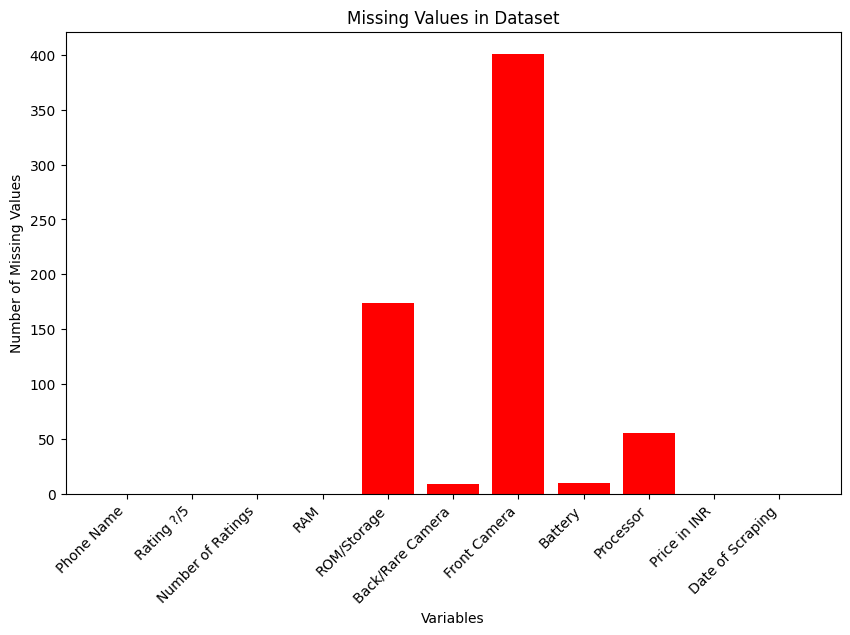

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='red')
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Dataset')
plt.xticks(rotation=45, ha='right') 
plt.show()

## Representing the percentage of missing values visually

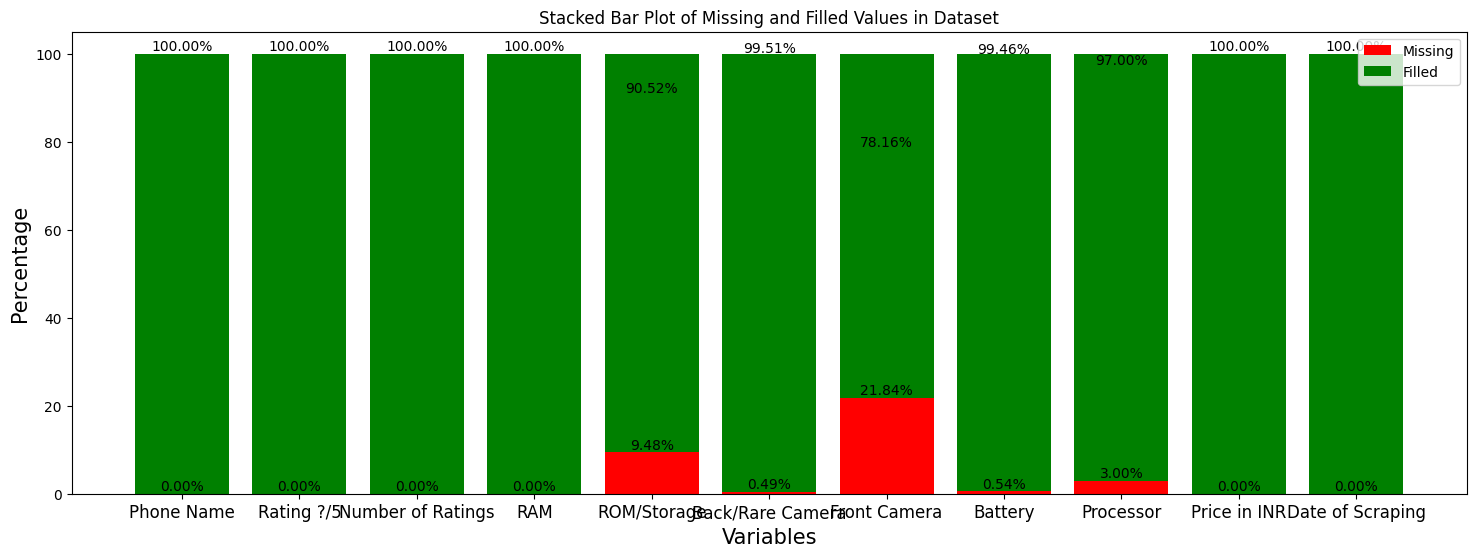

In [59]:
missing_percentage = (mobile_prices_2023_csv_df.isnull().sum() / len(mobile_prices_2023_csv_df)) * 100
filled_percentage = 100 - missing_percentage


plt.figure(figsize=(18, 6))

bars1= plt.bar(missing_percentage.index, missing_percentage, label='Missing', color='red')
bars2= plt.bar(filled_percentage.index, filled_percentage, bottom=missing_percentage, label='Filled', color='green')

plt.xlabel('Variables',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.title('Stacked Bar Plot of Missing and Filled Values in Dataset')
plt.xticks(fontsize=12)
plt.legend()

for bar1 in bars1:
    yval = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')
# 
for bar1, bar2 in zip(bars1, bars2):
    yval = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()

## Unique values of the 'ROM' column

In [60]:
mobile_prices_2023_csv_df['ROM/Storage'].unique()

array(['32 GB ROM', '64 GB ROM', '128 GB ROM', '256 GB ROM', nan,
       '0 GB ROM', 'Expandable Upto 16 GB', '4 MB ROM', 'NA KB ROM',
       '153 MB ROM', '512 GB ROM', '8 GB ROM', '2 MB ROM', '2.27 MB ROM',
       '16 GB ROM', '32 MB ROM', '16 MB ROM', '48 MB ROM',
       'Expandable Upto 32 GB', '128 MB ROM', '0.125 GB ROM', '10 MB ROM',
       'NA ROM', '4 GB ROM', '20 MB ROM', '100 KB ROM', '100 MB ROM',
       'Expandable Upto 8 GB'], dtype=object)

- we have observed that ruppes symbol in price in INR column

In [61]:
mobile_prices_2023_csv_df['Price in INR'] = mobile_prices_2023_csv_df['Price in INR'].str.replace('₹', '').str.replace(',', '').astype(float)

- we have some abnormal values for processor column

In [62]:
#cleaning processor column
mobile_prices_2023_csv_df['Processor'] = mobile_prices_2023_csv_df['Processor'].str.replace('1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories', 'Unknown')
mobile_prices_2023_csv_df.head()

Phone Name  Rating ?/5 Number of Ratings       RAM  \
0   POCO C50 (Royal Blue, 32 GB)         4.2            33,561  2 GB RAM   
1  POCO M4 5G (Cool Blue, 64 GB)         4.2            77,128  4 GB RAM   
2   POCO C51 (Royal Blue, 64 GB)         4.3            15,175  4 GB RAM   
3    POCO C55 (Cool Blue, 64 GB)         4.2            22,621  4 GB RAM   
4  POCO C51 (Power Black, 64 GB)         4.3            15,175  4 GB RAM   

  ROM/Storage       Back/Rare Camera      Front Camera   Battery  \
0   32 GB ROM        8MP Dual Camera  5MP Front Camera  5000 mAh   
1   64 GB ROM             50MP + 2MP  8MP Front Camera  5000 mAh   
2   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3   64 GB ROM  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                                           Processor  Price in INR  \
0  Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...        5649.0   
1                   Mediatek Dimensity 700 Processor       11999.0   
2                                Helio G36 Processor        6999.0   
3                       Mediatek Helio G85 Processor        7749.0   
4                                Helio G36 Processor        6999.0   

  Date of Scraping  
0       2023-06-17  
1       2023-06-17  
2       2023-06-17  
3       2023-06-17  
4       2023-06-17

In [63]:
mobile_prices_2023_csv_df['Processor'] = mobile_prices_2023_csv_df['Processor'].str.split(',').str[0]
mobile_prices_2023_csv_df.head()

Phone Name  Rating ?/5 Number of Ratings       RAM  \
0   POCO C50 (Royal Blue, 32 GB)         4.2            33,561  2 GB RAM   
1  POCO M4 5G (Cool Blue, 64 GB)         4.2            77,128  4 GB RAM   
2   POCO C51 (Royal Blue, 64 GB)         4.3            15,175  4 GB RAM   
3    POCO C55 (Cool Blue, 64 GB)         4.2            22,621  4 GB RAM   
4  POCO C51 (Power Black, 64 GB)         4.3            15,175  4 GB RAM   

  ROM/Storage       Back/Rare Camera      Front Camera   Battery  \
0   32 GB ROM        8MP Dual Camera  5MP Front Camera  5000 mAh   
1   64 GB ROM             50MP + 2MP  8MP Front Camera  5000 mAh   
2   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3   64 GB ROM  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                          Processor  Price in INR Date of Scraping  
0      Mediatek Helio A22 Processor        5649.0       2023-06-17  
1  Mediatek Dimensity 700 Processor       11999.0       2023-06-17  
2               Helio G36 Processor        6999.0       2023-06-17  
3      Mediatek Helio G85 Processor        7749.0       2023-06-17  
4               Helio G36 Processor        6999.0       2023-06-17

## we have commas in Number of Ratings ,we need to convert them into integer

In [64]:
mobile_prices_2023_csv_df['Number of Ratings'] = mobile_prices_2023_csv_df['Number of Ratings'].str.replace(',', '').astype(int)
mobile_prices_2023_csv_df.head()

Phone Name  Rating ?/5  Number of Ratings       RAM  \
0   POCO C50 (Royal Blue, 32 GB)         4.2              33561  2 GB RAM   
1  POCO M4 5G (Cool Blue, 64 GB)         4.2              77128  4 GB RAM   
2   POCO C51 (Royal Blue, 64 GB)         4.3              15175  4 GB RAM   
3    POCO C55 (Cool Blue, 64 GB)         4.2              22621  4 GB RAM   
4  POCO C51 (Power Black, 64 GB)         4.3              15175  4 GB RAM   

  ROM/Storage       Back/Rare Camera      Front Camera   Battery  \
0   32 GB ROM        8MP Dual Camera  5MP Front Camera  5000 mAh   
1   64 GB ROM             50MP + 2MP  8MP Front Camera  5000 mAh   
2   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3   64 GB ROM  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                          Processor  Price in INR Date of Scraping  
0      Mediatek Helio A22 Processor        5649.0       2023-06-17  
1  Mediatek Dimensity 700 Processor       11999.0       2023-06-17  
2               Helio G36 Processor        6999.0       2023-06-17  
3      Mediatek Helio G85 Processor        7749.0       2023-06-17  
4               Helio G36 Processor        6999.0       2023-06-17

## Cleaning the Ram column filling the abnormal values with Unknown 

In [65]:
mobile_prices_2023_csv_df['RAM'] = mobile_prices_2023_csv_df['RAM'].apply(lambda x: x if 'RAM' in x else 'Unknown')
mobile_prices_2023_csv_df.head()

Phone Name  Rating ?/5  Number of Ratings       RAM  \
0   POCO C50 (Royal Blue, 32 GB)         4.2              33561  2 GB RAM   
1  POCO M4 5G (Cool Blue, 64 GB)         4.2              77128  4 GB RAM   
2   POCO C51 (Royal Blue, 64 GB)         4.3              15175  4 GB RAM   
3    POCO C55 (Cool Blue, 64 GB)         4.2              22621  4 GB RAM   
4  POCO C51 (Power Black, 64 GB)         4.3              15175  4 GB RAM   

  ROM/Storage       Back/Rare Camera      Front Camera   Battery  \
0   32 GB ROM        8MP Dual Camera  5MP Front Camera  5000 mAh   
1   64 GB ROM             50MP + 2MP  8MP Front Camera  5000 mAh   
2   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3   64 GB ROM  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                          Processor  Price in INR Date of Scraping  
0      Mediatek Helio A22 Processor        5649.0       2023-06-17  
1  Mediatek Dimensity 700 Processor       11999.0       2023-06-17  
2               Helio G36 Processor        6999.0       2023-06-17  
3      Mediatek Helio G85 Processor        7749.0       2023-06-17  
4               Helio G36 Processor        6999.0       2023-06-17

## cleaning ROM column 

In [66]:
mobile_prices_2023_csv_df['ROM/Storage'] = mobile_prices_2023_csv_df['ROM/Storage'].apply(lambda x: x if isinstance(x, str) and 'ROM' in x else 'Unknown')
mobile_prices_2023_csv_df.head()

Phone Name  Rating ?/5  Number of Ratings       RAM  \
0   POCO C50 (Royal Blue, 32 GB)         4.2              33561  2 GB RAM   
1  POCO M4 5G (Cool Blue, 64 GB)         4.2              77128  4 GB RAM   
2   POCO C51 (Royal Blue, 64 GB)         4.3              15175  4 GB RAM   
3    POCO C55 (Cool Blue, 64 GB)         4.2              22621  4 GB RAM   
4  POCO C51 (Power Black, 64 GB)         4.3              15175  4 GB RAM   

  ROM/Storage       Back/Rare Camera      Front Camera   Battery  \
0   32 GB ROM        8MP Dual Camera  5MP Front Camera  5000 mAh   
1   64 GB ROM             50MP + 2MP  8MP Front Camera  5000 mAh   
2   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3   64 GB ROM  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                          Processor  Price in INR Date of Scraping  
0      Mediatek Helio A22 Processor        5649.0       2023-06-17  
1  Mediatek Dimensity 700 Processor       11999.0       2023-06-17  
2               Helio G36 Processor        6999.0       2023-06-17  
3      Mediatek Helio G85 Processor        7749.0       2023-06-17  
4               Helio G36 Processor        6999.0       2023-06-17

- DISPLAYING DTYPES AFTER CLEANING AND TRANSFORMATION

In [67]:
mobile_prices_2023_csv_df.dtypes

Phone Name            object
Rating ?/5           float64
Number of Ratings      int32
RAM                   object
ROM/Storage           object
Back/Rare Camera      object
Front Camera          object
Battery               object
Processor             object
Price in INR         float64
Date of Scraping      object
dtype: object

In [68]:
mobile_prices_2023_csv_df.RAM.value_counts()

RAM
8 GB RAM           438
4 GB RAM           383
6 GB RAM           322
Unknown            189
3 GB RAM           175
2 GB RAM           108
12 GB RAM           91
4 MB RAM            53
1 GB RAM            18
0.046875 GB RAM      8
32 MB RAM            8
8 MB RAM             7
16 GB RAM            6
64 MB RAM            6
512 MB RAM           5
128 MB RAM           5
16 MB RAM            4
48 MB RAM            2
153 MB RAM           2
256 MB RAM           2
768 MB RAM           1
1 MB RAM             1
0.53 RAM             1
1.5 GB RAM           1
Name: count, dtype: int64

- WE OBSERVE THAT MORE MOBILES ARE WITH 8 GB RAM

## Changing the column names

In [69]:
mobile_prices_2023_csv_df.rename(columns={'Rating ?/5':'Rating','ROM/Storage': 'ROM', 'RAM': 'RAM', 'Back/Rare Camera': 'Rare Camera', 'Price in INR': 'Price'}, inplace=True)


In [70]:
mobile_prices_2023_csv_df.dtypes

Phone Name            object
Rating               float64
Number of Ratings      int32
RAM                   object
ROM                   object
Rare Camera           object
Front Camera          object
Battery               object
Processor             object
Price                float64
Date of Scraping      object
dtype: object

In [71]:
mobile_prices_2023_csv_df.ROM.value_counts()

ROM
128 GB ROM      689
64 GB ROM       401
32 GB ROM       210
256 GB ROM      189
Unknown         189
4 MB ROM         41
16 GB ROM        33
8 GB ROM         15
32 MB ROM        13
128 MB ROM       11
0.125 GB ROM      8
4 GB ROM          7
16 MB ROM         7
48 MB ROM         5
512 GB ROM        4
10 MB ROM         2
2.27 MB ROM       2
153 MB ROM        2
100 MB ROM        2
2 MB ROM          1
NA KB ROM         1
NA ROM            1
0 GB ROM          1
20 MB ROM         1
100 KB ROM        1
Name: count, dtype: int64

- we observed that most of the mobiles having 128 gb rom

In [72]:
mobile_prices_2023_csv_df['ROM'] = mobile_prices_2023_csv_df['ROM'].str.extract('(\d+)').astype(float)
mobile_prices_2023_csv_df['RAM'] = mobile_prices_2023_csv_df['RAM'].str.extract('(\d+)').astype(float)
mobile_prices_2023_csv_df.head()

Phone Name  Rating  Number of Ratings  RAM   ROM  \
0   POCO C50 (Royal Blue, 32 GB)     4.2              33561  2.0  32.0   
1  POCO M4 5G (Cool Blue, 64 GB)     4.2              77128  4.0  64.0   
2   POCO C51 (Royal Blue, 64 GB)     4.3              15175  4.0  64.0   
3    POCO C55 (Cool Blue, 64 GB)     4.2              22621  4.0  64.0   
4  POCO C51 (Power Black, 64 GB)     4.3              15175  4.0  64.0   

             Rare Camera      Front Camera   Battery  \
0        8MP Dual Camera  5MP Front Camera  5000 mAh   
1             50MP + 2MP  8MP Front Camera  5000 mAh   
2   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                          Processor    Price Date of Scraping  
0      Mediatek Helio A22 Processor   5649.0       2023-06-17  
1  Mediatek Dimensity 700 Processor  11999.0       2023-06-17  
2               Helio G36 Processor   6999.0       2023-06-17  
3      Mediatek Helio G85 Processor   7749.0       2023-06-17  
4               Helio G36 Processor   6999.0       2023-06-17

In [73]:
mobile_prices_2023_csv_df.head()

Phone Name  Rating  Number of Ratings  RAM   ROM  \
0   POCO C50 (Royal Blue, 32 GB)     4.2              33561  2.0  32.0   
1  POCO M4 5G (Cool Blue, 64 GB)     4.2              77128  4.0  64.0   
2   POCO C51 (Royal Blue, 64 GB)     4.3              15175  4.0  64.0   
3    POCO C55 (Cool Blue, 64 GB)     4.2              22621  4.0  64.0   
4  POCO C51 (Power Black, 64 GB)     4.3              15175  4.0  64.0   

             Rare Camera      Front Camera   Battery  \
0        8MP Dual Camera  5MP Front Camera  5000 mAh   
1             50MP + 2MP  8MP Front Camera  5000 mAh   
2   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                          Processor    Price Date of Scraping  
0      Mediatek Helio A22 Processor   5649.0       2023-06-17  
1  Mediatek Dimensity 700 Processor  11999.0       2023-06-17  
2               Helio G36 Processor   6999.0       2023-06-17  
3      Mediatek Helio G85 Processor   7749.0       2023-06-17  
4               Helio G36 Processor   6999.0       2023-06-17

In [74]:
mobile_prices_2023_csv_df[['Brand', 'Specifications']] = mobile_prices_2023_csv_df['Phone Name'].str.split('(',n= 1, expand=True)
mobile_prices_2023_csv_df['Brand'] = mobile_prices_2023_csv_df['Brand'].str.strip()
mobile_prices_2023_csv_df['Specifications'] = mobile_prices_2023_csv_df['Specifications'].str.strip(')')
mobile_prices_2023_csv_df.drop(columns=['Phone Name'], inplace=True)
mobile_prices_2023_csv_df.head()

Rating  Number of Ratings  RAM   ROM            Rare Camera  \
0     4.2              33561  2.0  32.0        8MP Dual Camera   
1     4.2              77128  4.0  64.0             50MP + 2MP   
2     4.3              15175  4.0  64.0   8MP Dual Rear Camera   
3     4.2              22621  4.0  64.0  50MP Dual Rear Camera   
4     4.3              15175  4.0  64.0   8MP Dual Rear Camera   

       Front Camera   Battery                         Processor    Price  \
0  5MP Front Camera  5000 mAh      Mediatek Helio A22 Processor   5649.0   
1  8MP Front Camera  5000 mAh  Mediatek Dimensity 700 Processor  11999.0   
2  5MP Front Camera  5000 mAh               Helio G36 Processor   6999.0   
3  5MP Front Camera  5000 mAh      Mediatek Helio G85 Processor   7749.0   
4  5MP Front Camera  5000 mAh               Helio G36 Processor   6999.0   

  Date of Scraping       Brand      Specifications  
0       2023-06-17    POCO C50   Royal Blue, 32 GB  
1       2023-06-17  POCO M4 5G    Cool Blue, 64 GB  
2       2023-06-17    POCO C51   Royal Blue, 64 GB  
3       2023-06-17    POCO C55    Cool Blue, 64 GB  
4       2023-06-17    POCO C51  Power Black, 64 GB

Cleaning Missing Values 

- Handling missing values with mode

In [75]:
mobile_prices_2023_csv_df.columns

Index(['Rating', 'Number of Ratings', 'RAM', 'ROM', 'Rare Camera',
       'Front Camera', 'Battery', 'Processor', 'Price', 'Date of Scraping',
       'Brand', 'Specifications'],
      dtype='object')

In [76]:
mobile_prices_2023_csv_df['RAM'].isna().value_counts()


RAM
False    1647
True      189
Name: count, dtype: int64

In [77]:
mobile_prices_2023_csv_df['RAM']=np.where(mobile_prices_2023_csv_df['RAM'].isna()==True,mobile_prices_2023_csv_df['RAM'].mode(),mobile_prices_2023_csv_df['RAM'])

In [78]:
mobile_prices_2023_csv_df['RAM'].isna().value_counts()

RAM
False    1836
Name: count, dtype: int64

In [79]:
mobile_prices_2023_csv_df['ROM'].isna().value_counts()


ROM
False    1645
True      191
Name: count, dtype: int64

In [80]:
mobile_prices_2023_csv_df['ROM']=np.where(mobile_prices_2023_csv_df['ROM'].isna()==True,mobile_prices_2023_csv_df['ROM'].mode(),mobile_prices_2023_csv_df['ROM'])

In [81]:
mobile_prices_2023_csv_df['ROM'].isna().value_counts()

ROM
False    1836
Name: count, dtype: int64

In [82]:
mobile_prices_2023_csv_df['Rare Camera'].isna().value_counts()


Rare Camera
False    1827
True        9
Name: count, dtype: int64

In [83]:
mobile_prices_2023_csv_df['Rare Camera']=np.where(mobile_prices_2023_csv_df['Rare Camera'].isna()==True,mobile_prices_2023_csv_df['Rare Camera'].mode(),mobile_prices_2023_csv_df['Rare Camera'])

In [84]:
mobile_prices_2023_csv_df['Rare Camera'].isna().value_counts()


Rare Camera
False    1836
Name: count, dtype: int64

In [85]:
mobile_prices_2023_csv_df['Front Camera'].isna().value_counts()


Front Camera
False    1435
True      401
Name: count, dtype: int64

In [86]:
mobile_prices_2023_csv_df['Front Camera']=np.where(mobile_prices_2023_csv_df['Front Camera'].isna()==True,mobile_prices_2023_csv_df['Front Camera'].mode(),mobile_prices_2023_csv_df['Front Camera'])

In [87]:
mobile_prices_2023_csv_df['Front Camera'].isna().value_counts()


Front Camera
False    1836
Name: count, dtype: int64

In [88]:
mobile_prices_2023_csv_df['Battery'].isna().value_counts()


Battery
False    1826
True       10
Name: count, dtype: int64

In [89]:
mobile_prices_2023_csv_df['Battery']=np.where(mobile_prices_2023_csv_df['Battery'].isna()==True,mobile_prices_2023_csv_df['Battery'].mode(),mobile_prices_2023_csv_df['Battery'])

In [90]:
mobile_prices_2023_csv_df['Battery'].isna().value_counts()


Battery
False    1836
Name: count, dtype: int64

In [91]:
mobile_prices_2023_csv_df['Processor'].isna().value_counts()


Processor
False    1781
True       55
Name: count, dtype: int64

In [92]:
mobile_prices_2023_csv_df['Processor']=np.where(mobile_prices_2023_csv_df['Processor'].isna()==True,mobile_prices_2023_csv_df['Processor'].mode(),mobile_prices_2023_csv_df['Processor'])

In [93]:
mobile_prices_2023_csv_df['Processor'].isna().value_counts()


Processor
False    1836
Name: count, dtype: int64

In [94]:
mobile_prices_2023_csv_df['Specifications'].isna().value_counts()

Specifications
False    1696
True      140
Name: count, dtype: int64

In [95]:
mobile_prices_2023_csv_df['Specifications']=np.where(mobile_prices_2023_csv_df['Specifications'].isna()==True,mobile_prices_2023_csv_df['Specifications'].mode(),mobile_prices_2023_csv_df['Specifications'])

In [96]:
mobile_prices_2023_csv_df['Specifications'].isna().value_counts()

Specifications
False    1836
Name: count, dtype: int64

# Data Cleaning Completed

In [97]:
mobile_prices_2023_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             1836 non-null   float64
 1   Number of Ratings  1836 non-null   int32  
 2   RAM                1836 non-null   float64
 3   ROM                1836 non-null   float64
 4   Rare Camera        1836 non-null   object 
 5   Front Camera       1836 non-null   object 
 6   Battery            1836 non-null   object 
 7   Processor          1836 non-null   object 
 8   Price              1836 non-null   float64
 9   Date of Scraping   1836 non-null   object 
 10  Brand              1836 non-null   object 
 11  Specifications     1836 non-null   object 
dtypes: float64(4), int32(1), object(7)
memory usage: 165.1+ KB


In [98]:
mobile_prices_2023_csv_df.columns

Index(['Rating', 'Number of Ratings', 'RAM', 'ROM', 'Rare Camera',
       'Front Camera', 'Battery', 'Processor', 'Price', 'Date of Scraping',
       'Brand', 'Specifications'],
      dtype='object')

In [99]:
# Define the desired column order
desired_column_order = ['Brand', 'Specifications', 'RAM', 'ROM', 'Front Camera', 'Rare Camera', 'Processor','Battery', 'Price', 'Rating', 'Number of Ratings', 'Date of Scraping']

# Create a new DataFrame with the desired column order
mobile_prices_2023_csv_df = mobile_prices_2023_csv_df[desired_column_order]

# Now, mobile_prices_2023_csv_df contains columns in the desired order


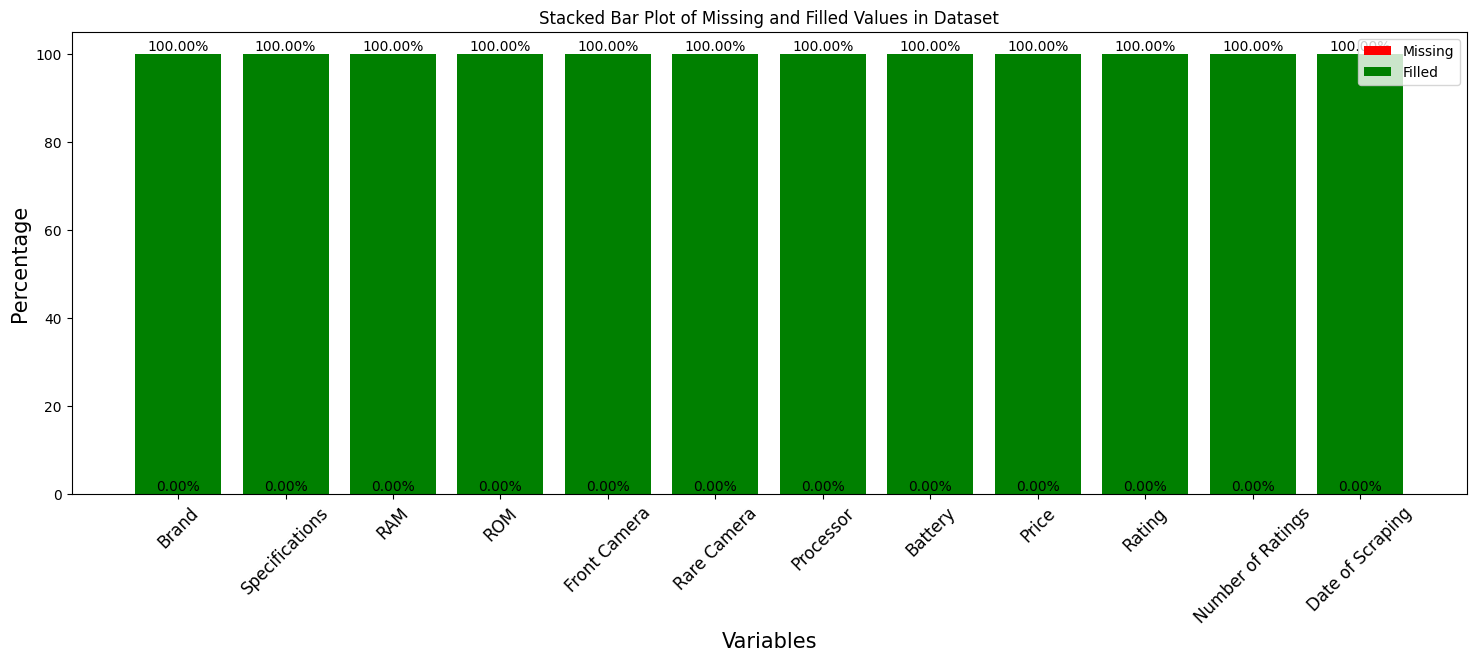

In [100]:
missing_percentage = (mobile_prices_2023_csv_df.isnull().sum() / len(mobile_prices_2023_csv_df)) * 100
filled_percentage = 100 - missing_percentage


plt.figure(figsize=(18, 6))

bars1= plt.bar(missing_percentage.index, missing_percentage, label='Missing', color='red')
bars2= plt.bar(filled_percentage.index, filled_percentage, bottom=missing_percentage, label='Filled', color='green')

plt.xlabel('Variables',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.title('Stacked Bar Plot of Missing and Filled Values in Dataset')
plt.xticks(rotation=45,fontsize=12)
plt.legend()

for bar1 in bars1:
    yval = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')
# 
for bar1, bar2 in zip(bars1, bars2):
    yval = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()

In [46]:
mobile_prices_2023_csv_df.head()

Brand      Specifications  RAM   ROM      Front Camera  \
0    POCO C50   Royal Blue, 32 GB  2.0  32.0  5MP Front Camera   
1  POCO M4 5G    Cool Blue, 64 GB  4.0  64.0  8MP Front Camera   
2    POCO C51   Royal Blue, 64 GB  4.0  64.0  5MP Front Camera   
3    POCO C55    Cool Blue, 64 GB  4.0  64.0  5MP Front Camera   
4    POCO C51  Power Black, 64 GB  4.0  64.0  5MP Front Camera   

             Rare Camera                         Processor   Battery    Price  \
0        8MP Dual Camera      Mediatek Helio A22 Processor  5000 mAh   5649.0   
1             50MP + 2MP  Mediatek Dimensity 700 Processor  5000 mAh  11999.0   
2   8MP Dual Rear Camera               Helio G36 Processor  5000 mAh   6999.0   
3  50MP Dual Rear Camera      Mediatek Helio G85 Processor  5000 mAh   7749.0   
4   8MP Dual Rear Camera               Helio G36 Processor  5000 mAh   6999.0   

   Rating ?/5  Number of Ratings Date of Scraping  
0         4.2              33561       2023-06-17  
1         4.2              77128       2023-06-17  
2         4.3              15175       2023-06-17  
3         4.2              22621       2023-06-17  
4         4.3              15175       2023-06-17

---


CA - 1 QUESTIONS


1) What are the names and data types of the columns ?

In [47]:
mobile_prices_2023_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1836 non-null   object 
 1   Specifications     1836 non-null   object 
 2   RAM                1836 non-null   float64
 3   ROM                1836 non-null   float64
 4   Front Camera       1836 non-null   object 
 5   Rare Camera        1836 non-null   object 
 6   Processor          1836 non-null   object 
 7   Battery            1836 non-null   object 
 8   Price              1836 non-null   float64
 9   Rating ?/5         1836 non-null   float64
 10  Number of Ratings  1836 non-null   int32  
 11  Date of Scraping   1836 non-null   object 
dtypes: float64(4), int32(1), object(7)
memory usage: 165.1+ KB


2) What are the basic summary statistics ?

In [48]:
mobile_prices_2023_csv_df.describe()

RAM          ROM          Price   Rating ?/5  Number of Ratings
count  1836.000000  1836.000000    1836.000000  1836.000000       1.836000e+03
mean      8.868736   108.455338   23726.387255     4.210512       4.669473e+04
std      34.071214    67.693529   24376.085113     0.543912       9.756649e+04
min       0.000000     0.000000    1199.000000     0.000000       0.000000e+00
25%       4.000000    64.000000    9999.000000     4.200000       1.313000e+03
50%       6.000000   128.000000   15999.000000     4.300000       8.391000e+03
75%       8.000000   128.000000   27990.000000     4.400000       4.149500e+04
max     768.000000   512.000000  169999.000000     4.800000       1.342530e+06

3) Are there any categorical variables and missing values ? if so print it.

In [49]:
mobile_prices_2023_csv_df.select_dtypes(include=['object','category'])

Brand          Specifications                  Front Camera  \
0            POCO C50       Royal Blue, 32 GB              5MP Front Camera   
1          POCO M4 5G        Cool Blue, 64 GB              8MP Front Camera   
2            POCO C51       Royal Blue, 64 GB              5MP Front Camera   
3            POCO C55        Cool Blue, 64 GB              5MP Front Camera   
4            POCO C51      Power Black, 64 GB              5MP Front Camera   
...               ...                     ...                           ...   
1831   Infinix Note 7     Forest Green, 64 GB             16MP Front Camera   
1832   Infinix Note 7     Bolivia Blue, 64 GB             16MP Front Camera   
1833   Infinix Note 7     Aether Black, 64 GB             16MP Front Camera   
1834  Infinix Zero 8i  Silver Diamond, 128 GB  16MP + 8MP Dual Front Camera   
1835       Infinix S5     Quetzal Cyan, 64 GB             32MP Front Camera   

                              Rare Camera                         Processor  \
0                         8MP Dual Camera      Mediatek Helio A22 Processor   
1                              50MP + 2MP  Mediatek Dimensity 700 Processor   
2                    8MP Dual Rear Camera               Helio G36 Processor   
3                   50MP Dual Rear Camera      Mediatek Helio G85 Processor   
4                    8MP Dual Rear Camera               Helio G36 Processor   
...                                   ...                               ...   
1831    48MP + 2MP + 2MP + AI Lens Camera      MediaTek Helio G70 Processor   
1832    48MP + 2MP + 2MP + AI Lens Camera      MediaTek Helio G70 Processor   
1833    48MP + 2MP + 2MP + AI Lens Camera      MediaTek Helio G70 Processor   
1834    48MP + 8MP + 2MP + AI Lens Camera     MediaTek Helio G90T Processor   
1835  16MP + 5MP + 2MP + Low Light Sensor     Helio P22 (MTK6762) Processor   

       Battery Date of Scraping  
0     5000 mAh       2023-06-17  
1     5000 mAh       2023-06-17  
2     5000 mAh       2023-06-17  
3     5000 mAh       2023-06-17  
4     5000 mAh       2023-06-17  
...        ...              ...  
1831  5000 mAh       2023-06-17  
1832  5000 mAh       2023-06-17  
1833  5000 mAh       2023-06-17  
1834  4500 mAh       2023-06-17  
1835  4000 mAh       2023-06-17  

[1836 rows x 7 columns]

In [50]:
mobile_prices_2023_csv_df.isna()

Brand  Specifications    RAM    ROM  Front Camera  Rare Camera  \
0     False           False  False  False         False        False   
1     False           False  False  False         False        False   
2     False           False  False  False         False        False   
3     False           False  False  False         False        False   
4     False           False  False  False         False        False   
...     ...             ...    ...    ...           ...          ...   
1831  False           False  False  False         False        False   
1832  False           False  False  False         False        False   
1833  False           False  False  False         False        False   
1834  False           False  False  False         False        False   
1835  False           False  False  False         False        False   

      Processor  Battery  Price  Rating ?/5  Number of Ratings  \
0         False    False  False       False              False   
1         False    False  False       False              False   
2         False    False  False       False              False   
3         False    False  False       False              False   
4         False    False  False       False              False   
...         ...      ...    ...         ...                ...   
1831      False    False  False       False              False   
1832      False    False  False       False              False   
1833      False    False  False       False              False   
1834      False    False  False       False              False   
1835      False    False  False       False              False   

      Date of Scraping  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
1831             False  
1832             False  
1833             False  
1834             False  
1835             False  

[1836 rows x 12 columns]

In [51]:

mobile_prices_2023_csv_df.select_dtypes(include=['object','category']).isna().value_counts()

Brand  Specifications  Front Camera  Rare Camera  Processor  Battery  Date of Scraping
False  False           False         False        False      False    False               1836
Name: count, dtype: int64

4) Are there any outliers in the data? if so use box plots,histograms and visualize.

In [52]:
numerical_columns=mobile_prices_2023_csv_df.select_dtypes(include='number')


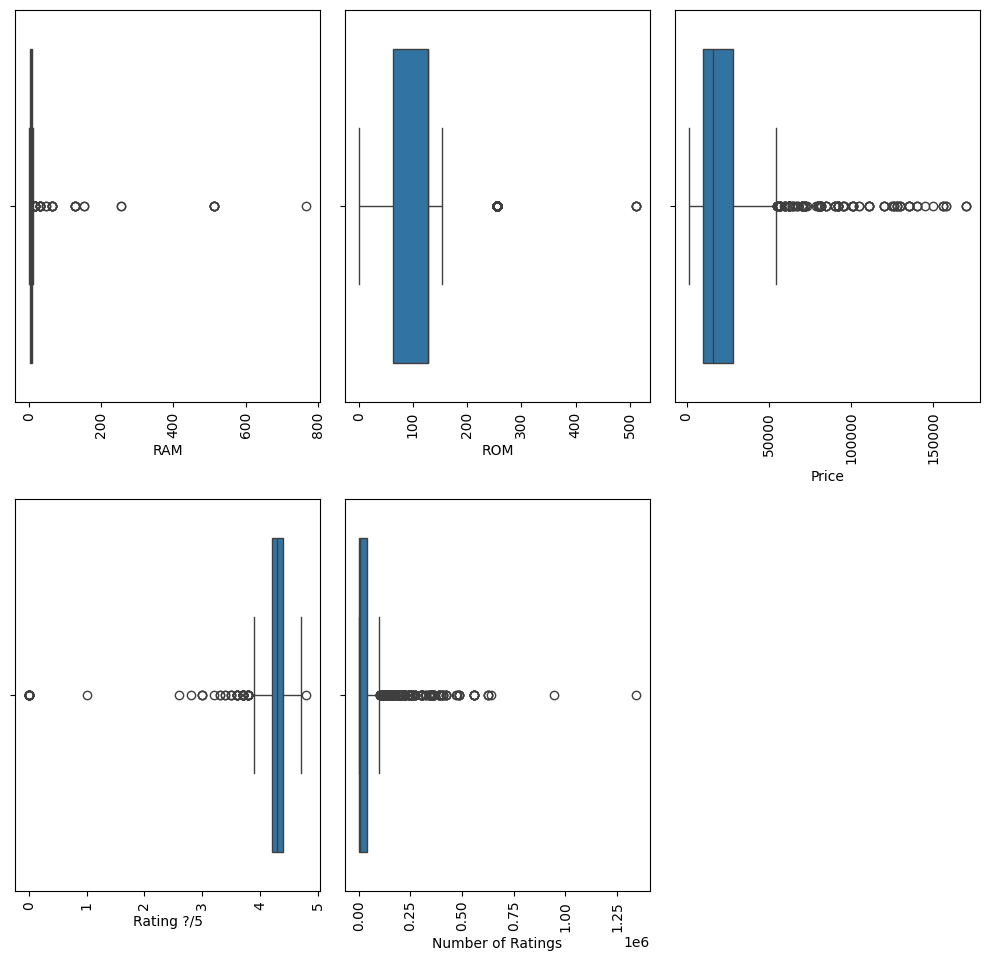

In [53]:
plt.figure(figsize=(10,14))
for i,col_nam in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=mobile_prices_2023_csv_df,x=col_nam)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [54]:
x= np.quantile(mobile_prices_2023_csv_df['RAM'],[0.25,0.75])
iqr = x[1]-x[0]
uw = x[1] + 1.5 * iqr
lw = x[0] - 1.5 * iqr

In [55]:
mobile_prices_2023_csv_df['RAM'] = np.where(mobile_prices_2023_csv_df['RAM']>uw,uw,(np.where(mobile_prices_2023_csv_df['RAM']<lw,lw,mobile_prices_2023_csv_df['RAM'])))


In [56]:
x= np.quantile(mobile_prices_2023_csv_df['ROM'],[0.25,0.75])
iqr = x[1]-x[0]
uw = x[1] + 1.5 * iqr
lw = x[0] - 1.5 * iqr

In [57]:
mobile_prices_2023_csv_df['ROM'] = np.where(mobile_prices_2023_csv_df['ROM']>uw,uw,(np.where(mobile_prices_2023_csv_df['ROM']<lw,lw,mobile_prices_2023_csv_df['ROM'])))


In [58]:
x= np.quantile(mobile_prices_2023_csv_df['Price'],[0.25,0.75])
iqr = x[1]-x[0]
uw = x[1] + 1.5 * iqr
lw = x[0] - 1.5 * iqr

In [59]:
mobile_prices_2023_csv_df['Price'] = np.where(mobile_prices_2023_csv_df['Price']>uw,uw,(np.where(mobile_prices_2023_csv_df['Price']<lw,lw,mobile_prices_2023_csv_df['Price'])))


In [60]:
x= np.quantile(mobile_prices_2023_csv_df['Rating ?/5'],[0.25,0.75])
iqr = x[1]-x[0]
uw = x[1] + 1.5 * iqr
lw = x[0] - 1.5 * iqr

In [61]:
mobile_prices_2023_csv_df['Rating ?/5'] = np.where(mobile_prices_2023_csv_df['Rating ?/5']>uw,uw,(np.where(mobile_prices_2023_csv_df['Rating ?/5']<lw,lw,mobile_prices_2023_csv_df['Rating ?/5'])))


In [62]:
x= np.quantile(mobile_prices_2023_csv_df['Number of Ratings'],[0.25,0.75])
iqr = x[1]-x[0]
uw = x[1] + 1.5 * iqr
lw = x[0] - 1.5 * iqr

In [63]:
mobile_prices_2023_csv_df['Number of Ratings'] = np.where(mobile_prices_2023_csv_df['Number of Ratings']>uw,uw,(np.where(mobile_prices_2023_csv_df['Number of Ratings']<lw,lw,mobile_prices_2023_csv_df['Number of Ratings'])))


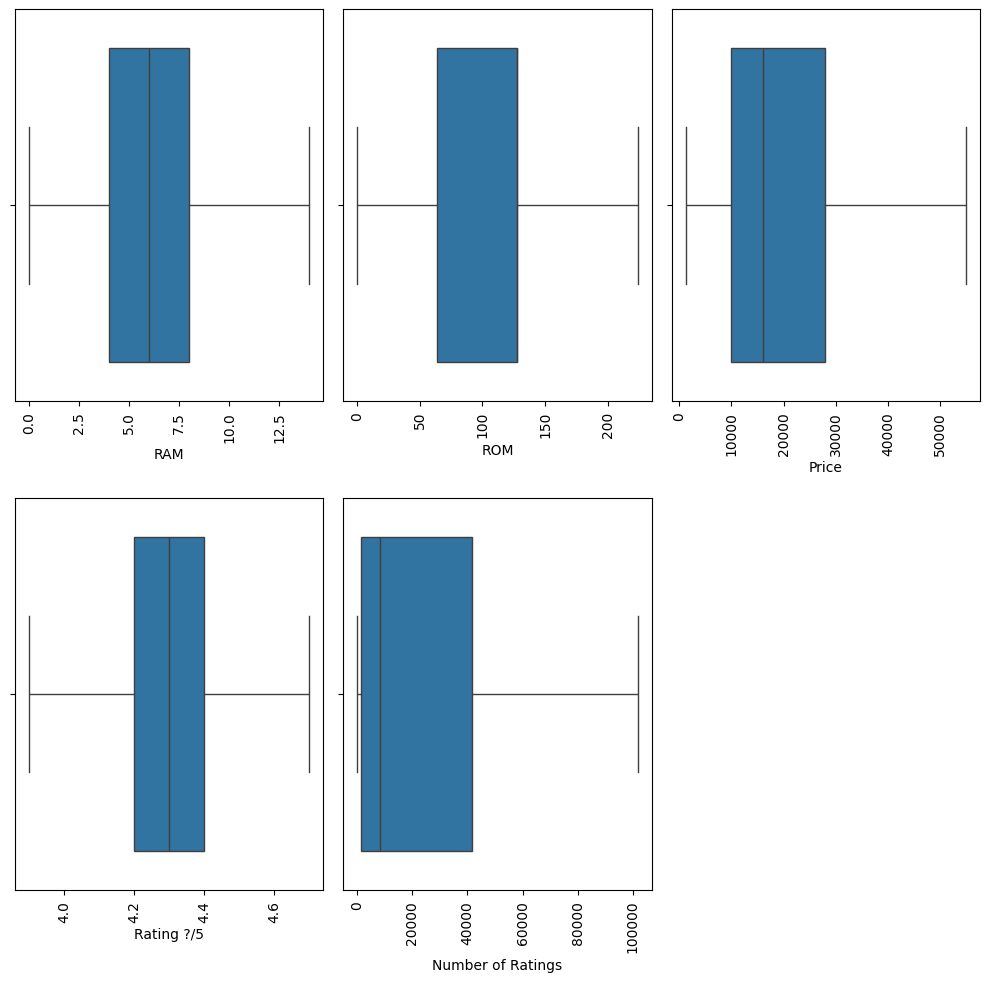

In [64]:
plt.figure(figsize=(10,14))
for i,col_nam in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=mobile_prices_2023_csv_df,x=col_nam)
    plt.xticks(rotation=90)
    plt.tight_layout()

---

In [65]:
15

15

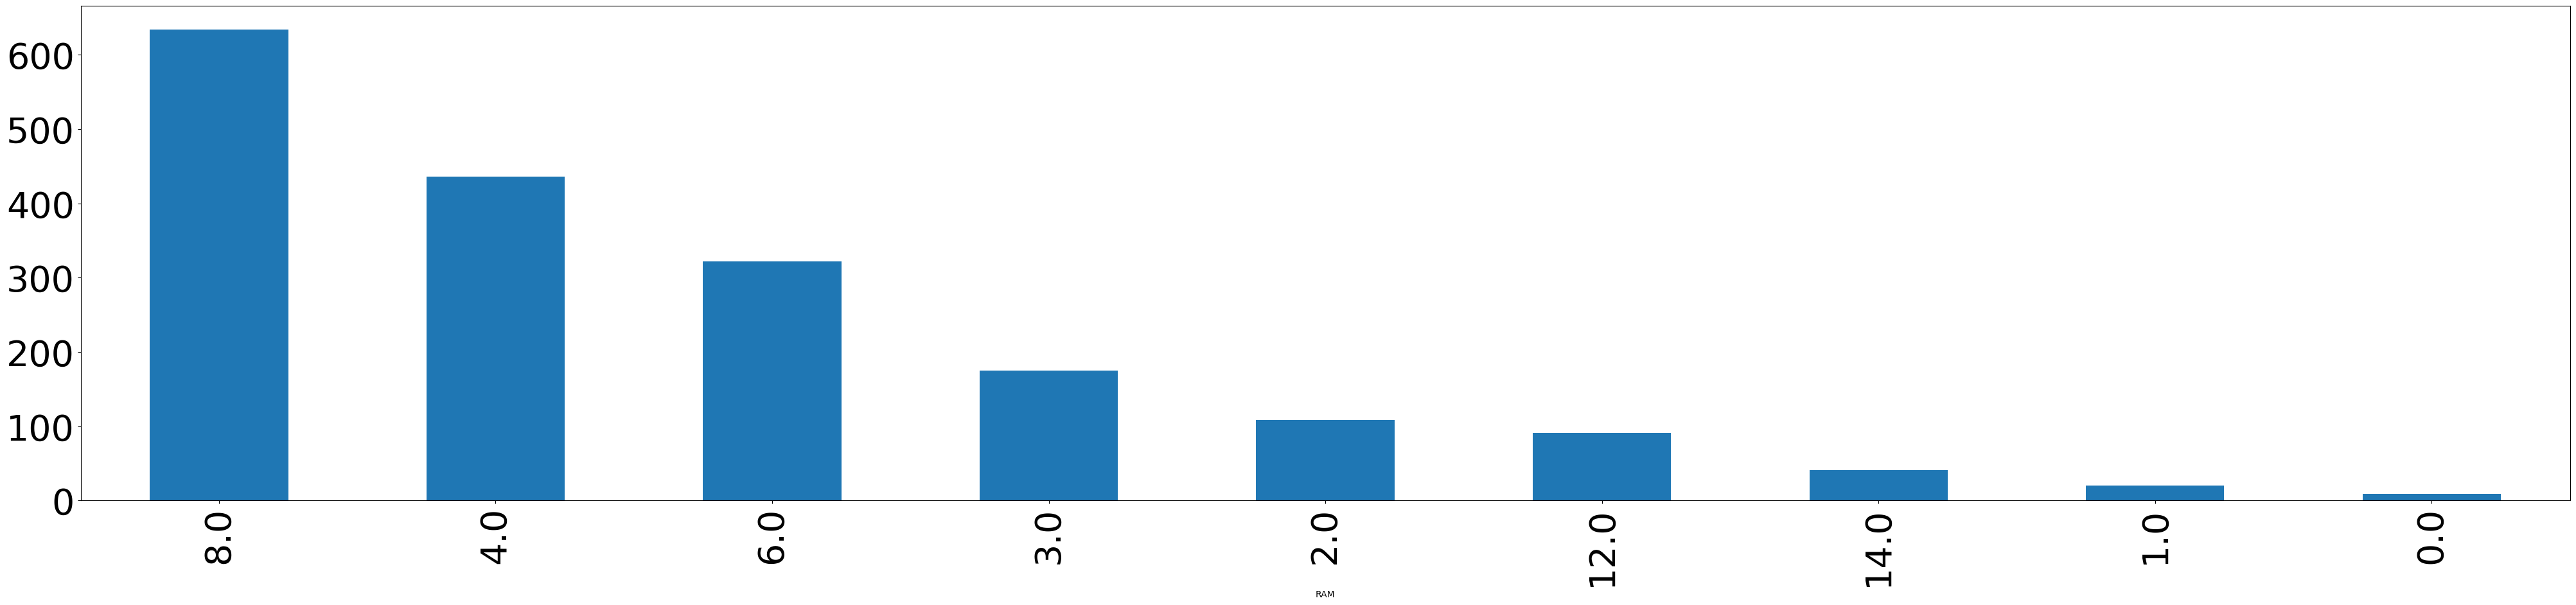

In [66]:
plt.figure(figsize=(50,10))
mobile_prices_2023_csv_df.RAM.value_counts().plot.bar()
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

In [67]:
Ramvalues = mobile_prices_2023_csv_df.RAM.value_counts().reset_index()
Ramvalues

RAM  count
0   8.0    634
1   4.0    436
2   6.0    322
3   3.0    175
4   2.0    108
5  12.0     91
6  14.0     41
7   1.0     20
8   0.0      9

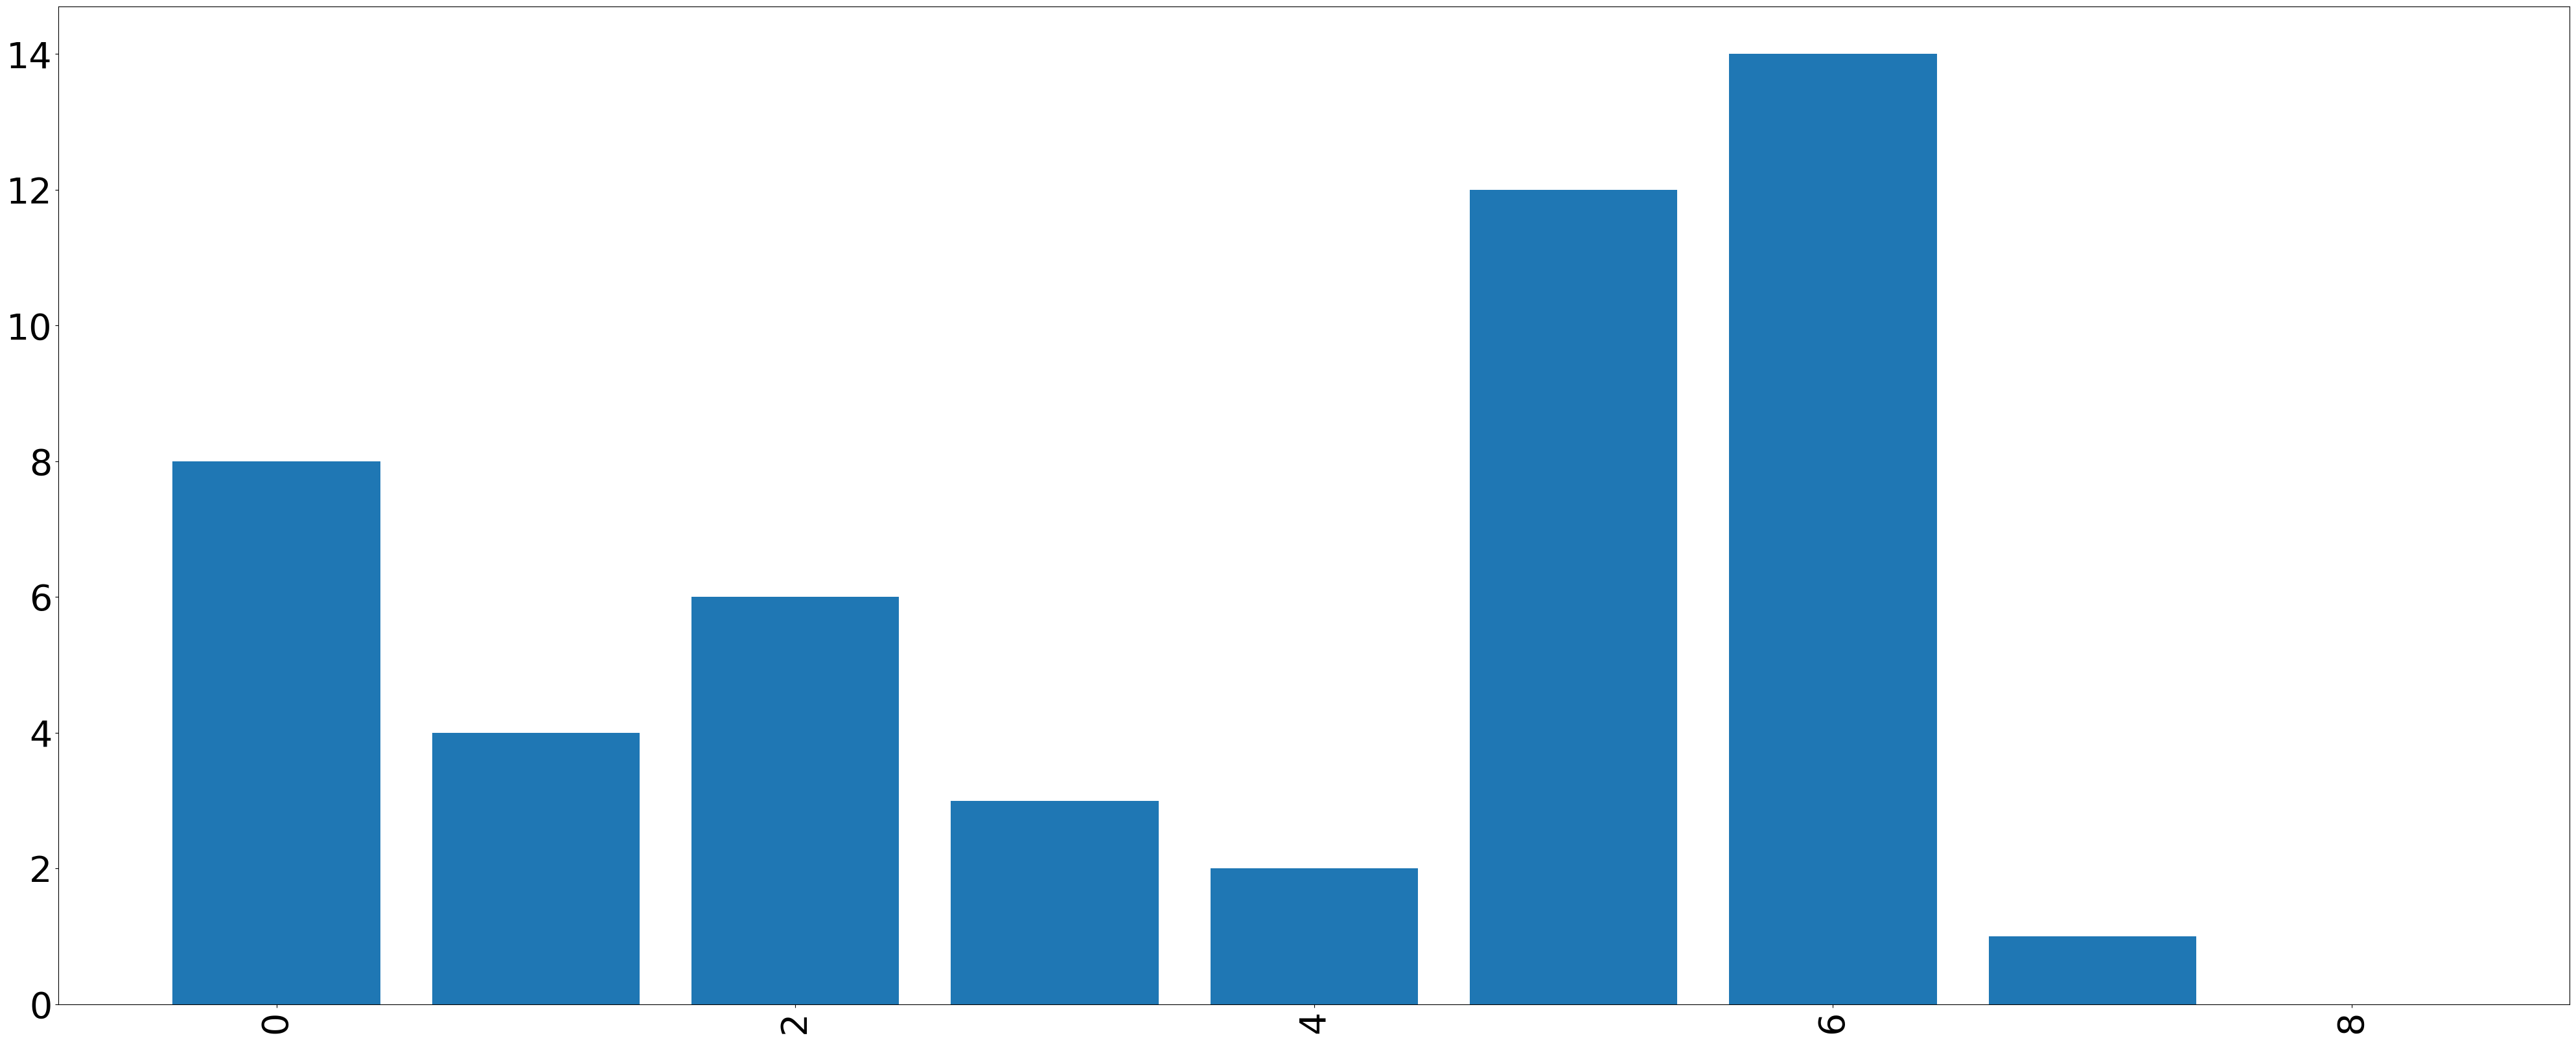

In [68]:
plt.figure(figsize=(50,20))
plt.bar(Ramvalues.index,Ramvalues['RAM'])
plt.xticks(rotation=90,fontsize=40)
plt.yticks(fontsize=40)
plt.show()

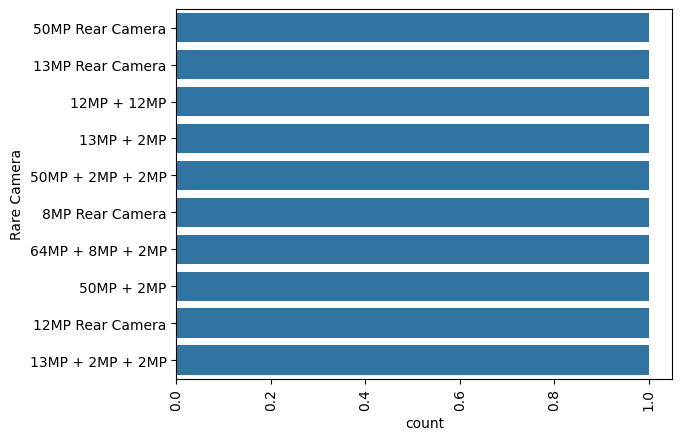

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
top_10_back_camera = mobile_prices_2023_csv_df['Rare Camera'].value_counts().head(10)

sns.countplot(top_10_back_camera.index)
plt.xticks(rotation=90)
plt.show()


In [70]:
plt.figure(figsize=(100,200))
sns.countplot(mobile_prices_2023_csv_df['Rare Camera'])
plt.xticks(rotation=90,fontsize=30)
plt.yticks(fontsize=50)
plt.show()


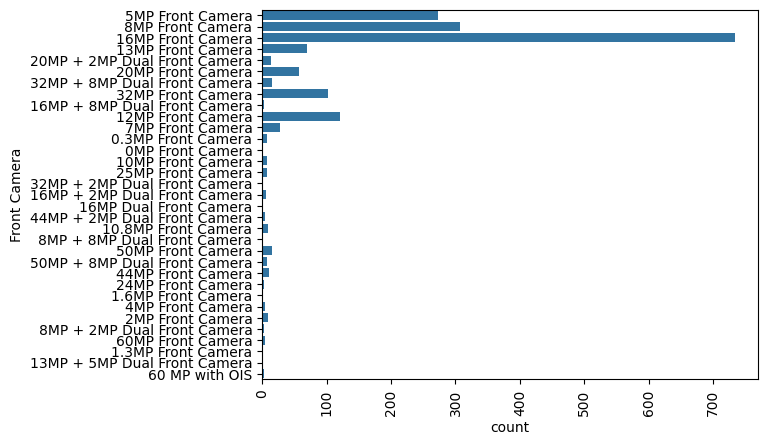

In [71]:
sns.countplot(mobile_prices_2023_csv_df['Front Camera'])
plt.xticks(rotation=90)
plt.show()


13

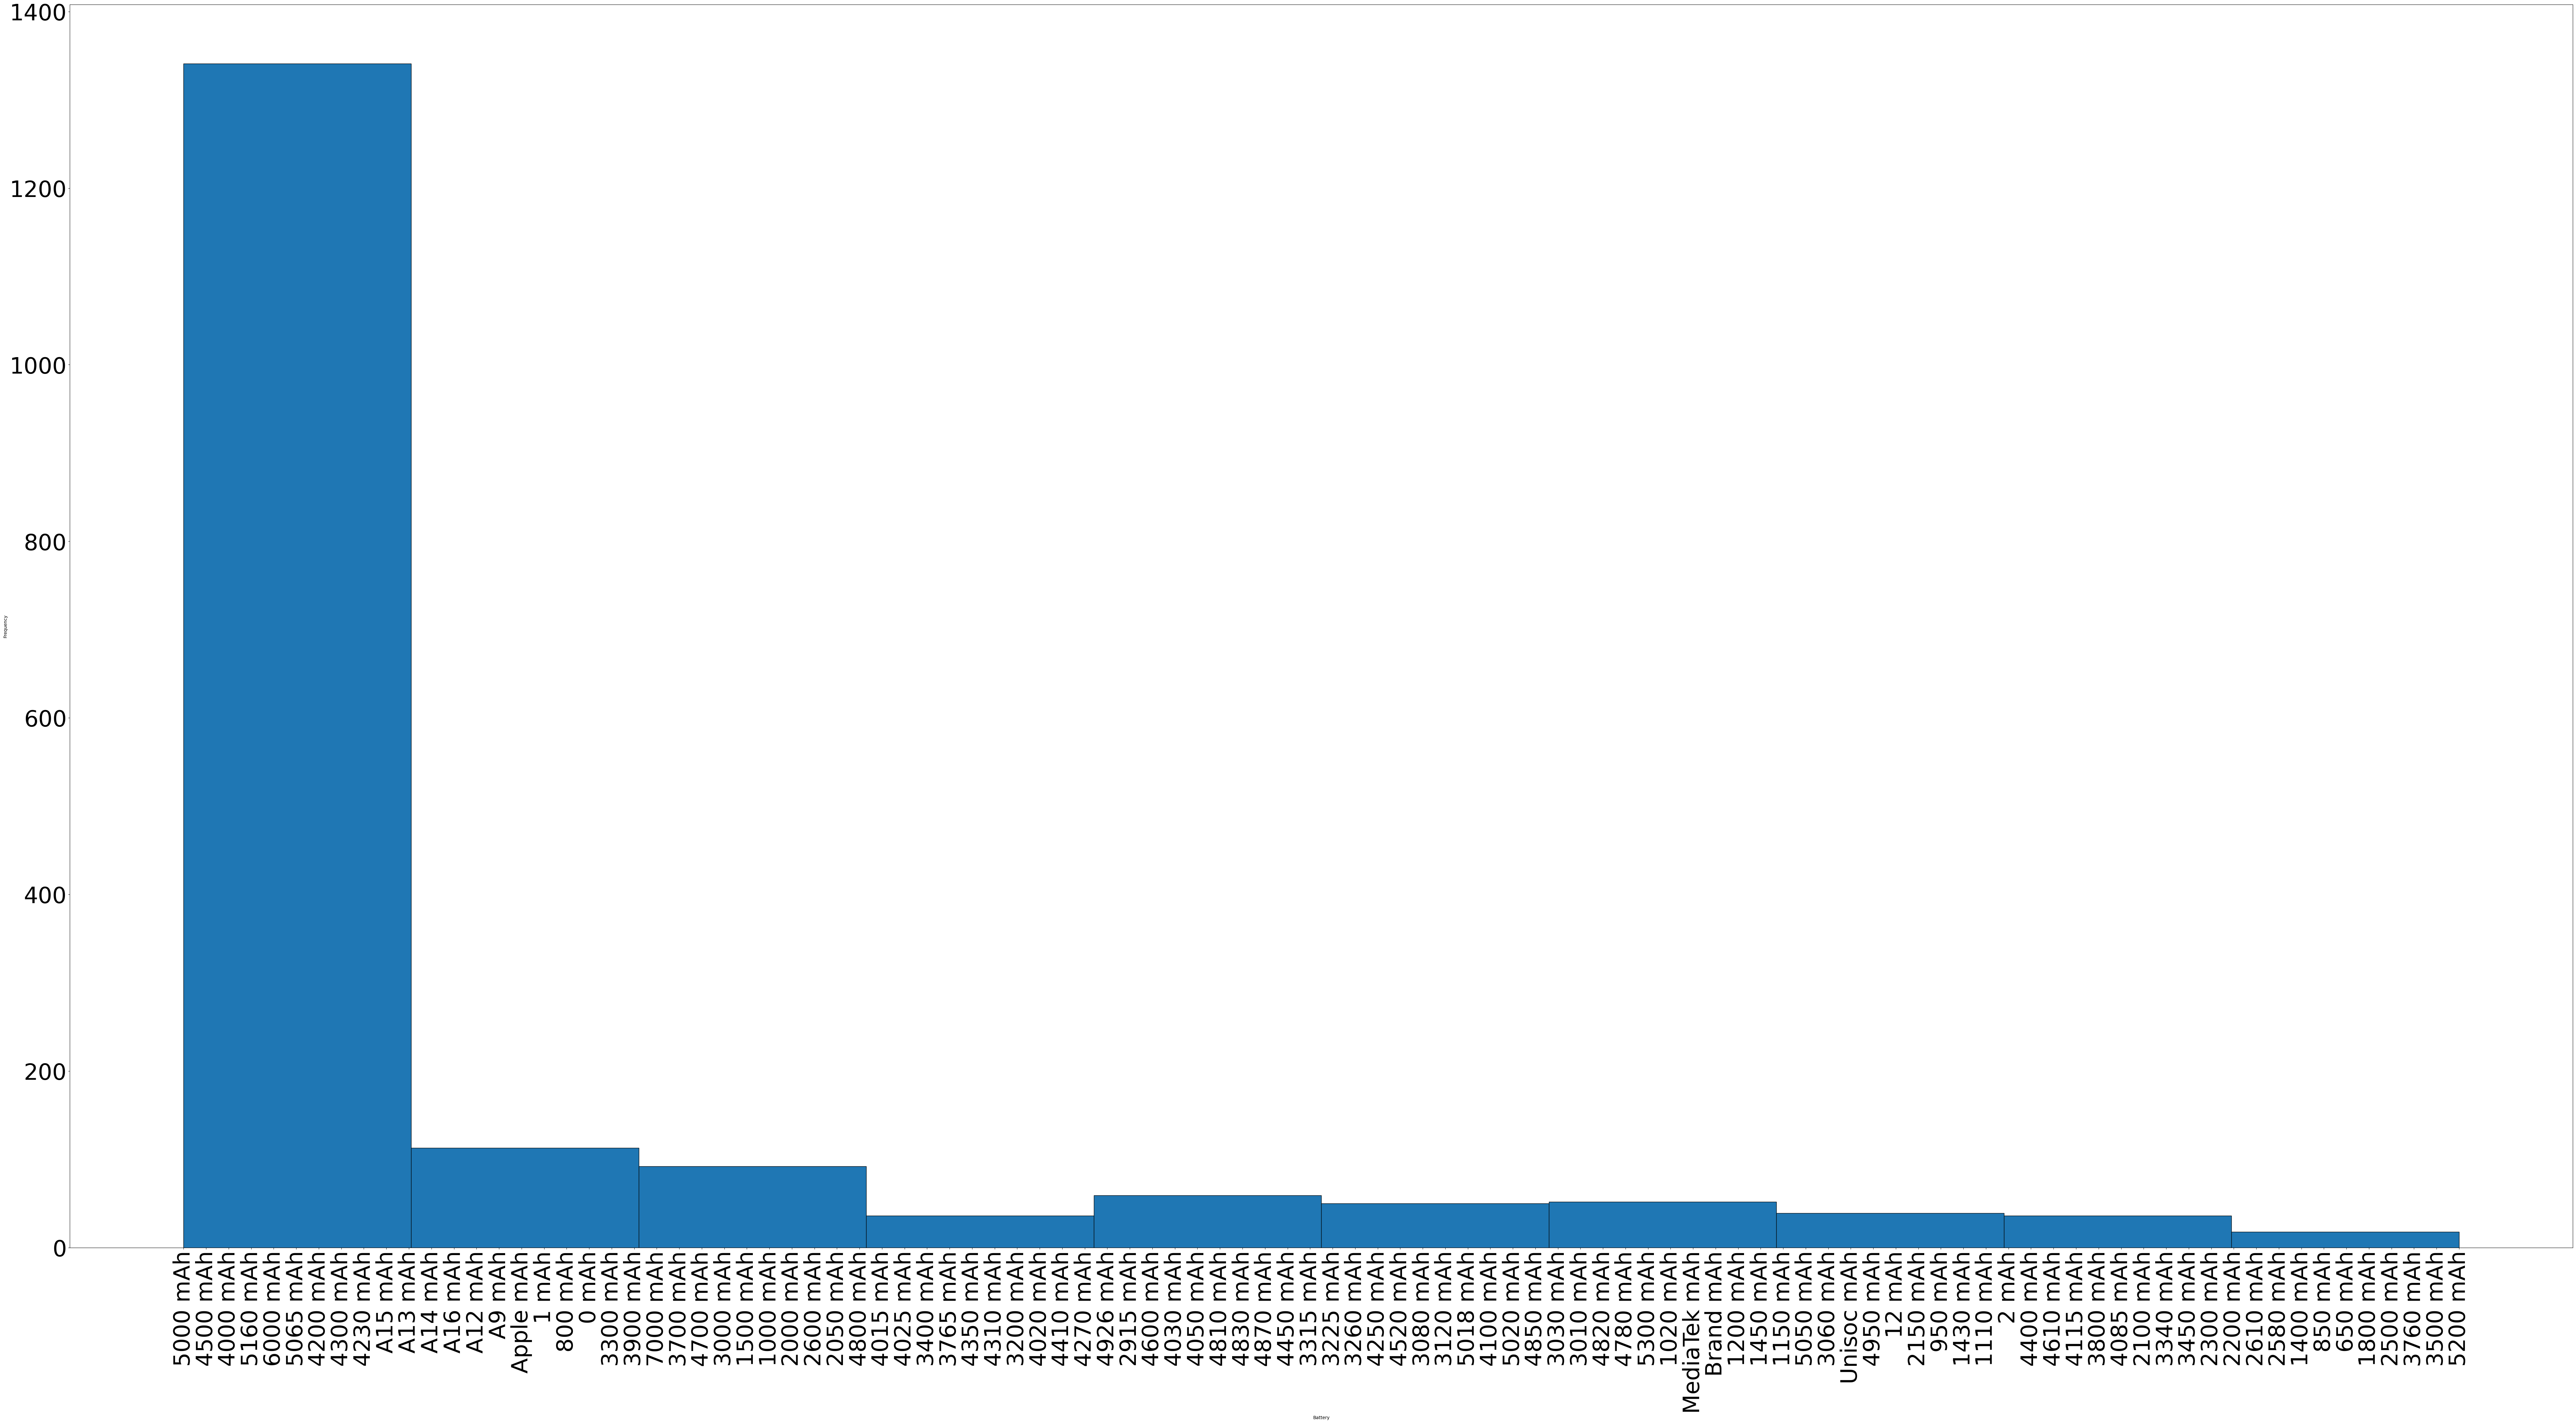

In [72]:
plt.figure(figsize=(100,50))
plt.hist(mobile_prices_2023_csv_df['Battery'], bins=10, edgecolor='black')
plt.xlabel('Battery')
plt.ylabel('Frequency')
plt.xticks(rotation=90,fontsize=50)
plt.yticks(fontsize=50)
plt.show()


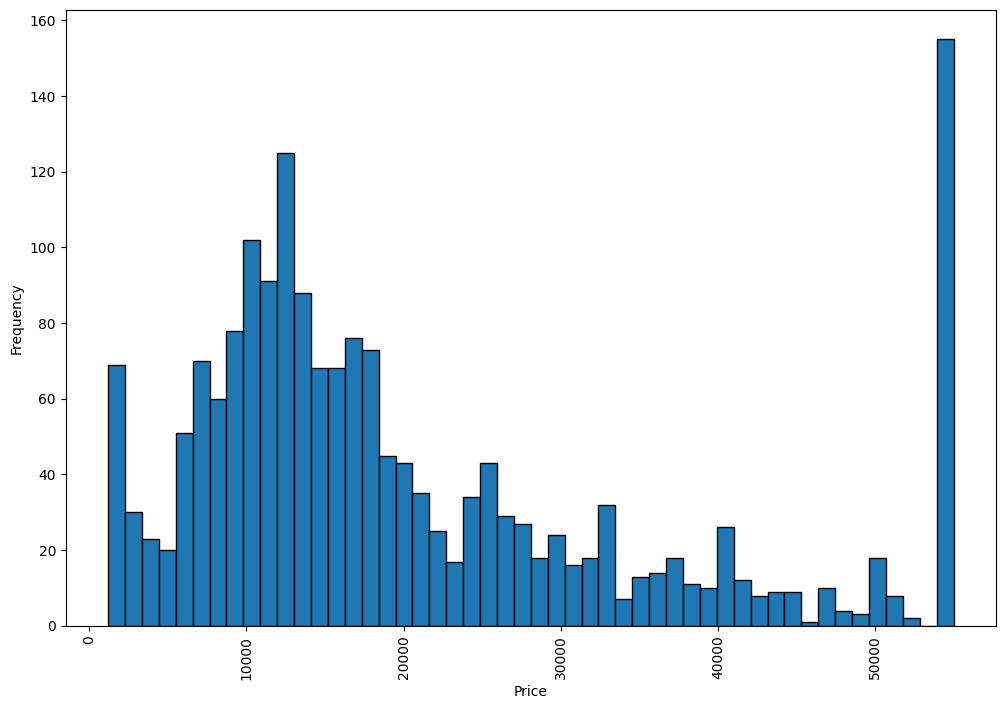

In [73]:
plt.figure(figsize=(12,8))
plt.hist(mobile_prices_2023_csv_df['Price'], bins=50,edgecolor = 'black')
plt.xticks(rotation=90)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


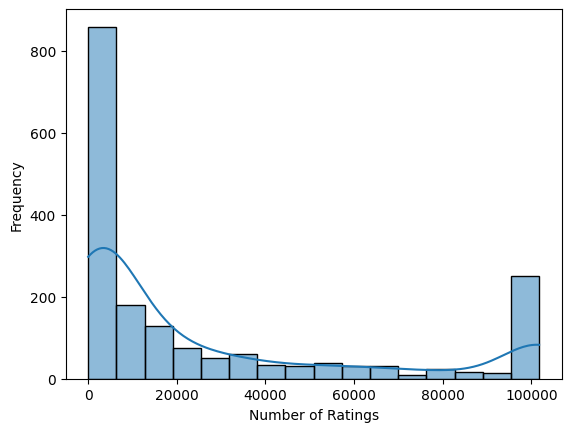

In [74]:
sns.histplot(mobile_prices_2023_csv_df['Number of Ratings'], kde=True, edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


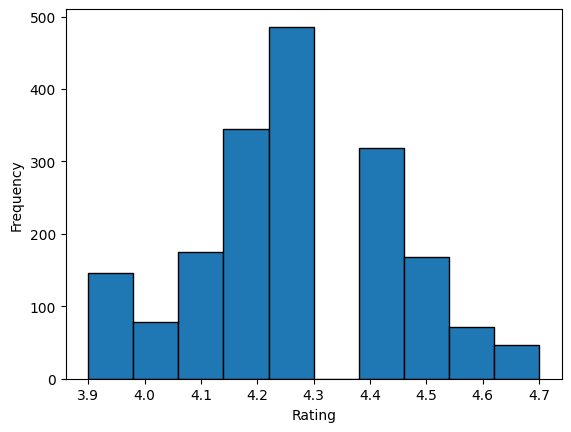

In [75]:
plt.hist(mobile_prices_2023_csv_df['Rating ?/5'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


1 question

In [76]:
mobile_prices_2023_csv_df['Rating ?/5'].mean()

4.2749455337690625

2 question

In [77]:
common_phone_names = mobile_prices_2023_csv_df['Brand'].value_counts().head(10)
print("Most common phone names:\n", common_phone_names)

Most common phone names:
 Brand
APPLE iPhone 14             16
APPLE iPhone 14 Plus        14
APPLE iPhone 13             13
realme GT Master Edition    12
APPLE iPhone 14 Pro         11
realme C55                  11
APPLE iPhone SE 3rd Gen     11
OnePlus 10R 5G              11
APPLE iPhone 12             10
vivo Y16                    10
Name: count, dtype: int64


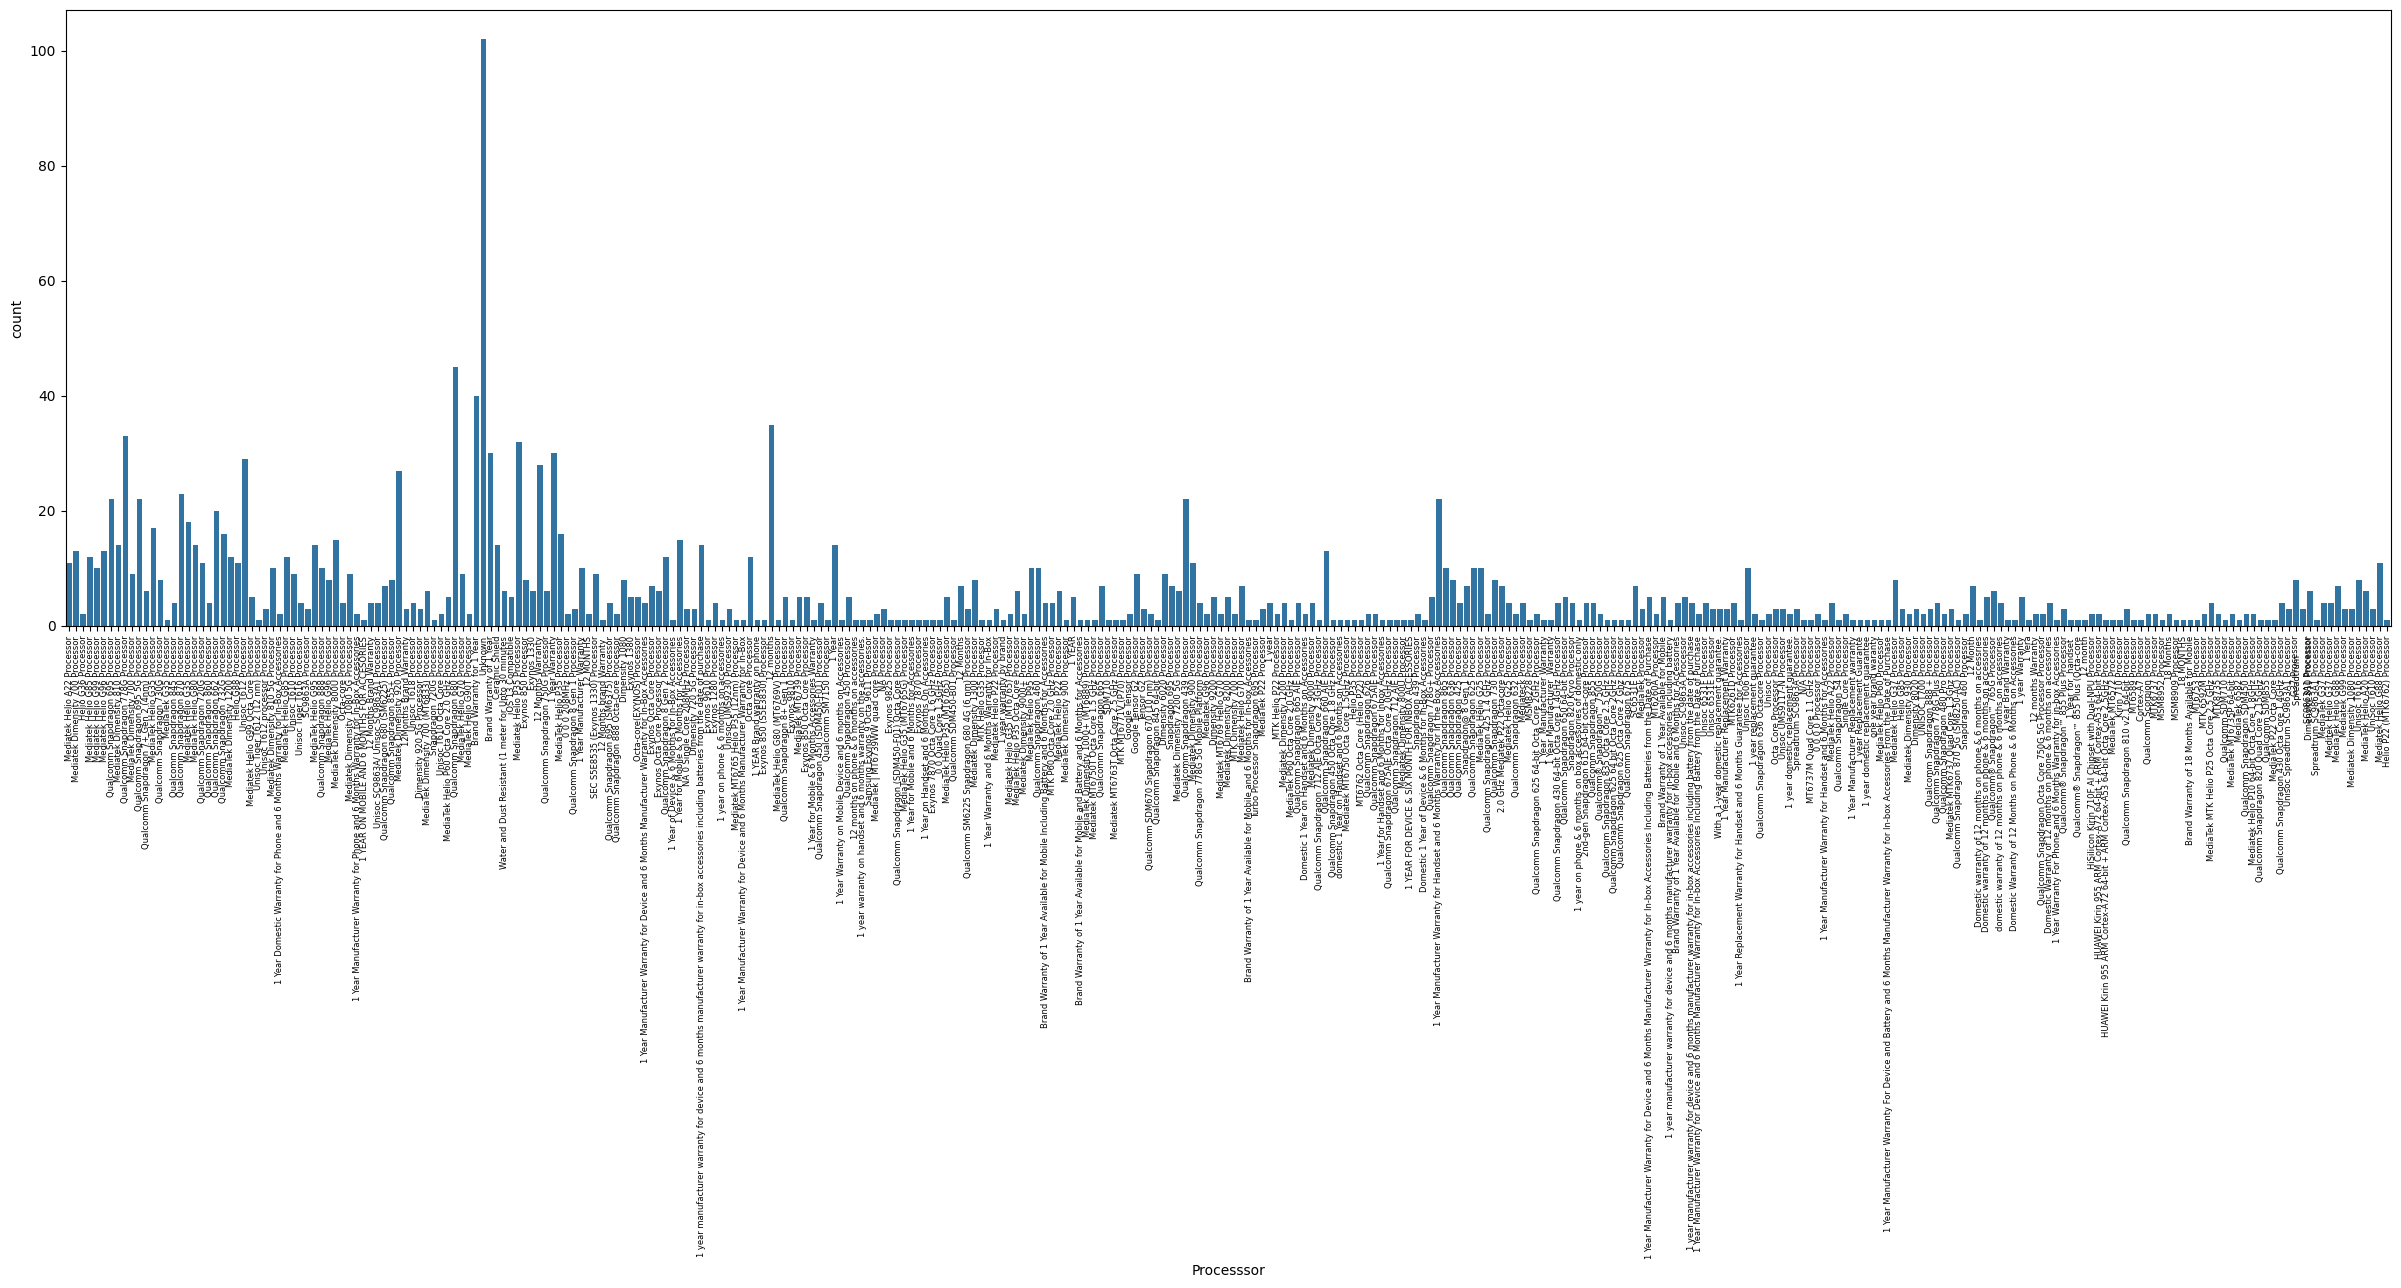

In [78]:
plt.figure(figsize=(30,8))
sns.countplot(data=mobile_prices_2023_csv_df,x='Processor')
plt.xlabel('Processsor')
plt.xticks(rotation=90,fontsize=6)
plt.show()


13 question

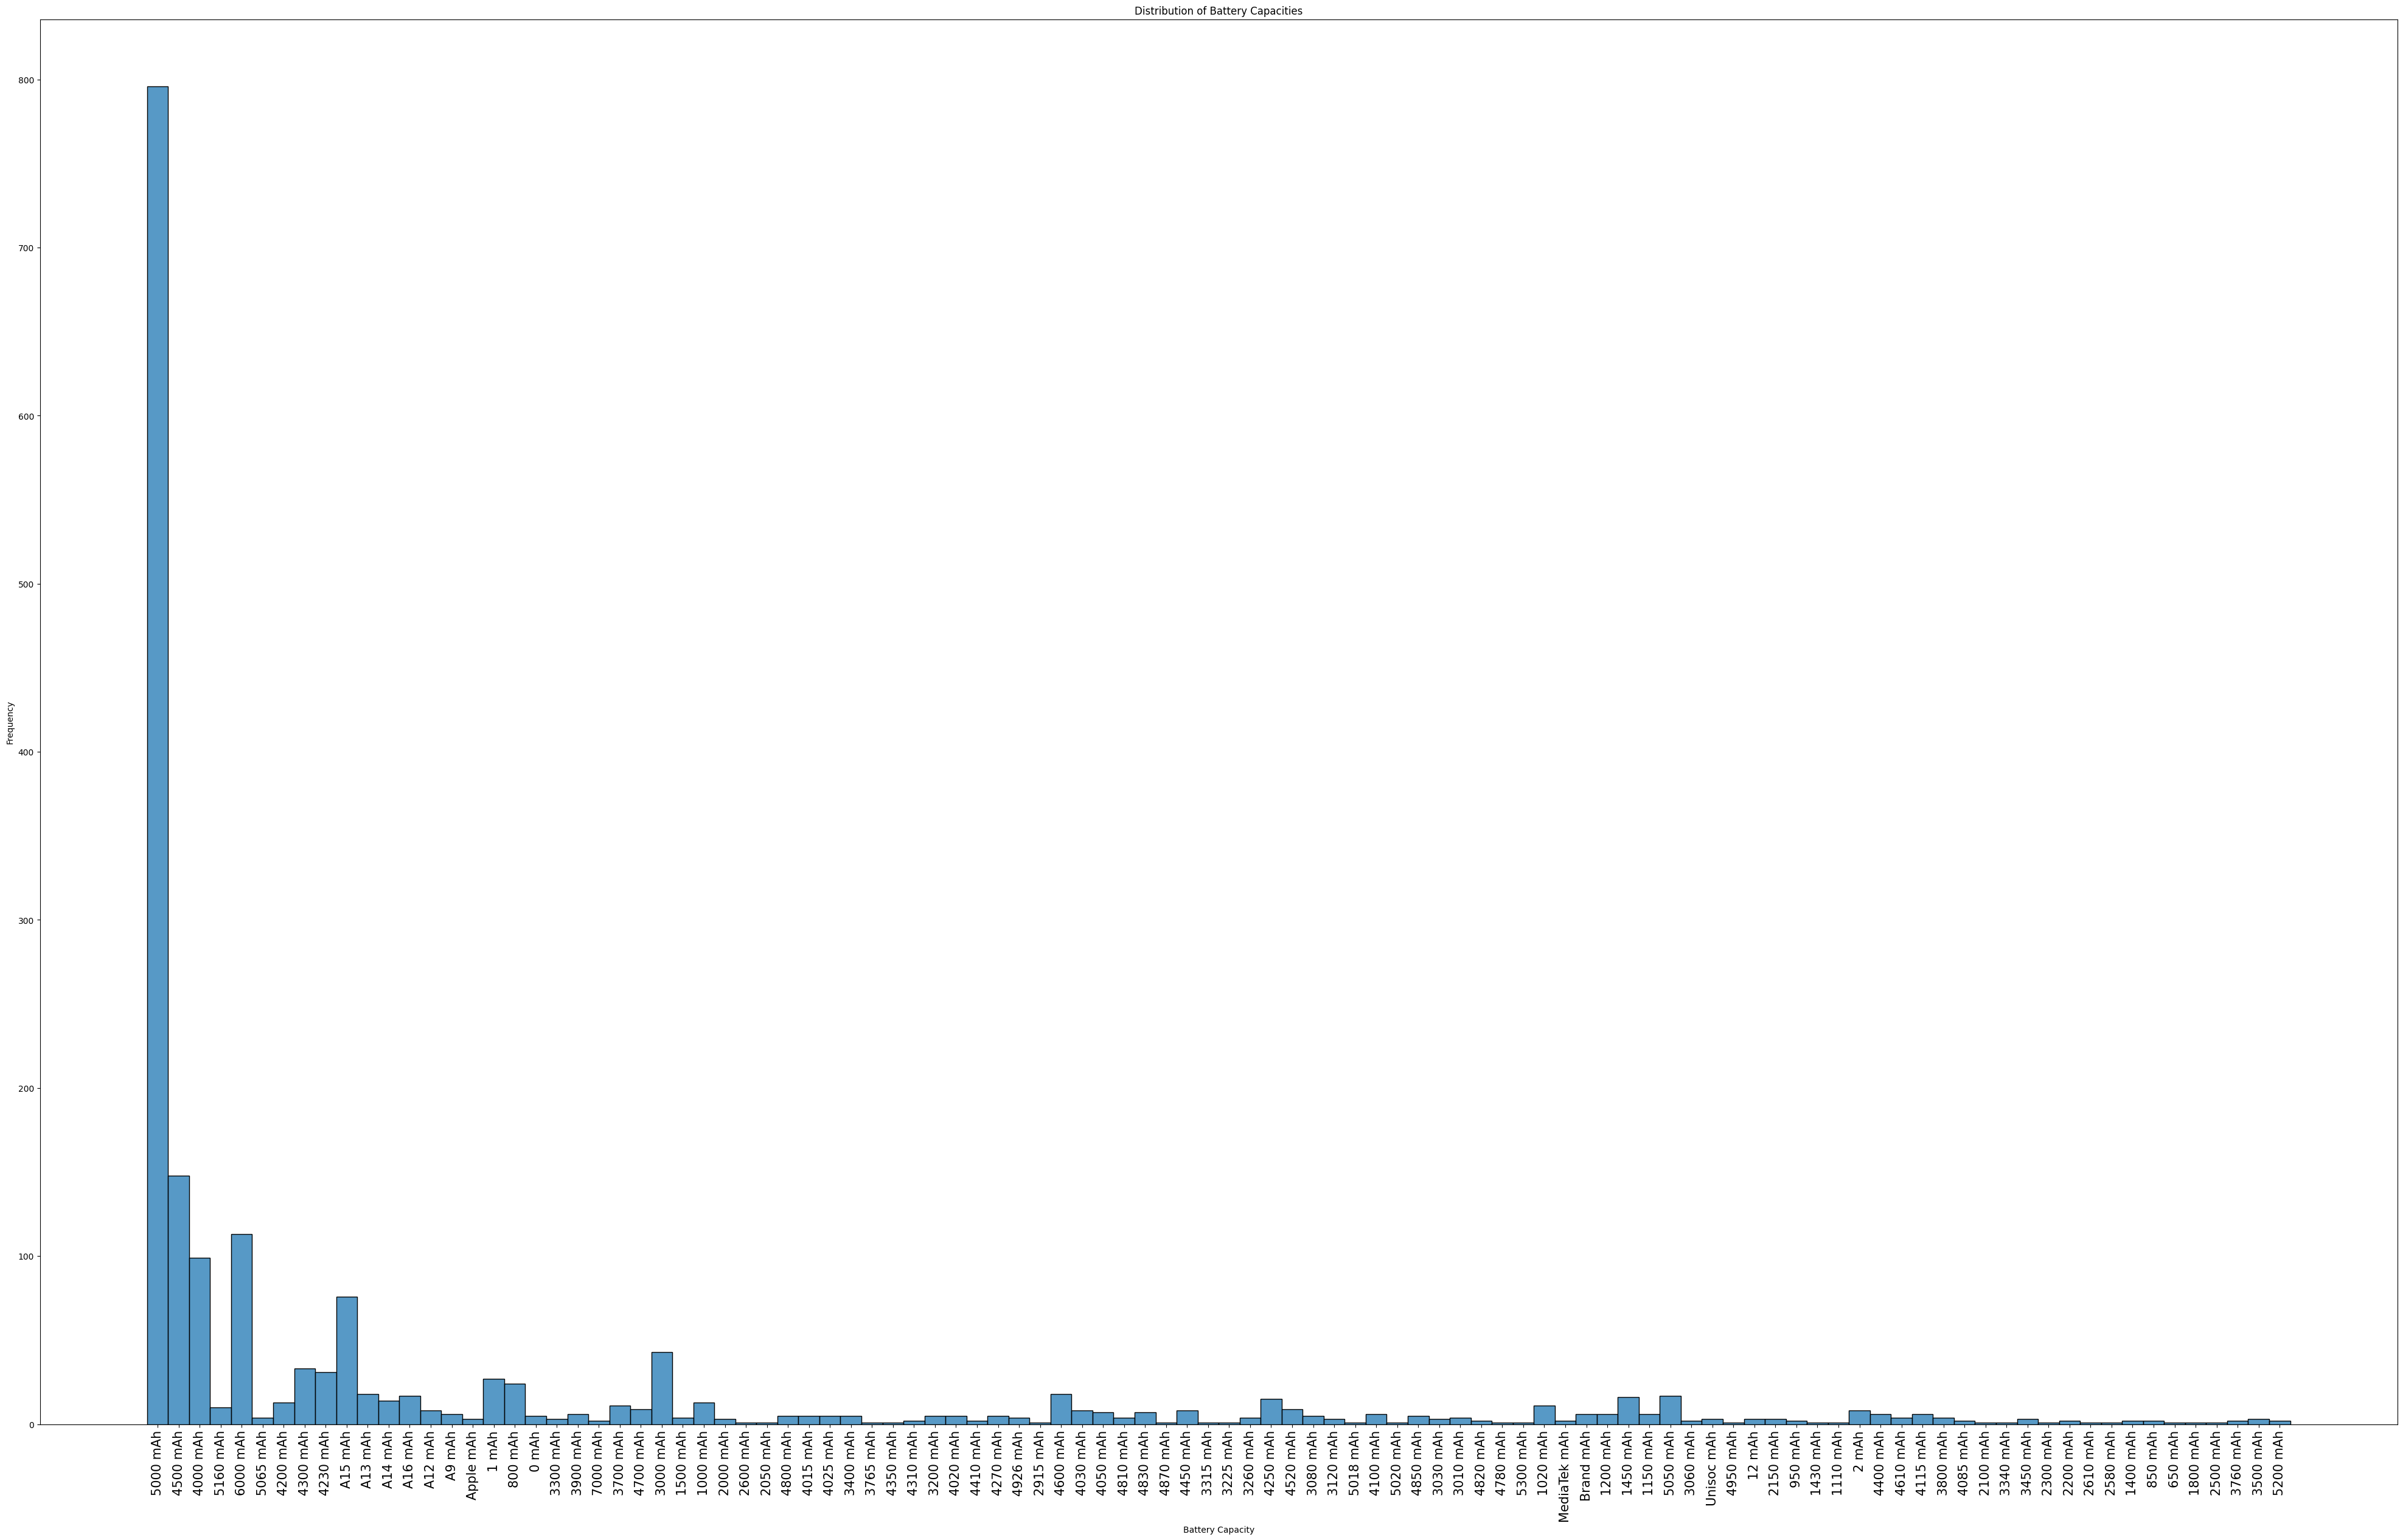

In [79]:
# 14 Distribution of battery capacities
plt.figure(figsize=(50,30))
sns.histplot(mobile_prices_2023_csv_df['Battery'])
plt.xlabel('Battery Capacity')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Capacities')
plt.xticks(rotation=90,fontsize=15)
plt.show()


15

In [80]:
# 9. Different processors
processors =mobile_prices_2023_csv_df['Processor'].value_counts().head(5)
print("Different processors:", processors)

Different processors: Processor
Unknown                               102
Qualcomm Snapdragon 680 Processor      45
Brand Warranty for 1 Year              40
12 months                              35
Qualcomm Snapdragon 778G Processor     33
Name: count, dtype: int64


12

In [81]:
# 12. Different ROM sizes
rom_sizes = mobile_prices_2023_csv_df['ROM'].value_counts().head(5)
print("Different ROM sizes:", rom_sizes)


Different ROM sizes: ROM
128.0    891
64.0     401
32.0     223
224.0    193
4.0       48
Name: count, dtype: int64


Most common phone names:
 Brand
APPLE iPhone 14             16
APPLE iPhone 14 Plus        14
APPLE iPhone 13             13
realme GT Master Edition    12
APPLE iPhone 14 Pro         11
realme C55                  11
APPLE iPhone SE 3rd Gen     11
OnePlus 10R 5G              11
APPLE iPhone 12             10
vivo Y16                    10
Name: count, dtype: int64


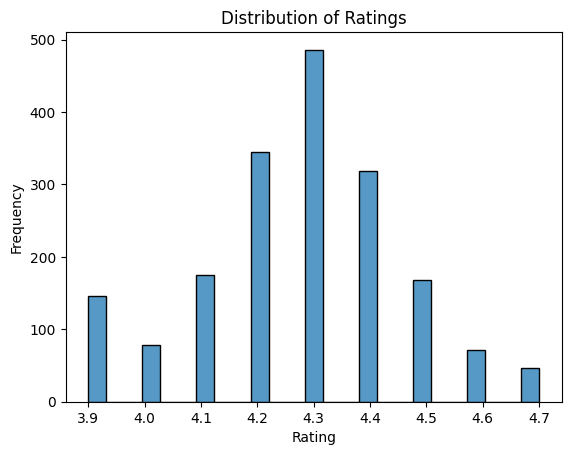

Range of Number of Ratings: 101768.0
Different RAM sizes: [ 2.  4.  6.  3.  8. 12.  0. 14.  1.]
Different storage capacities: [ 32.  64. 128. 224.   0.   4. 153.   8.   2.  16.  48.  10.  20. 100.]
Most common back camera specifications:
 Rare Camera
50MP Rear Camera    110
13MP Rear Camera     93
12MP + 12MP          81
13MP + 2MP           81
50MP + 2MP + 2MP     80
8MP Rear Camera      78
64MP + 8MP + 2MP     76
50MP + 2MP           71
12MP Rear Camera     60
13MP + 2MP + 2MP     55
Name: count, dtype: int64


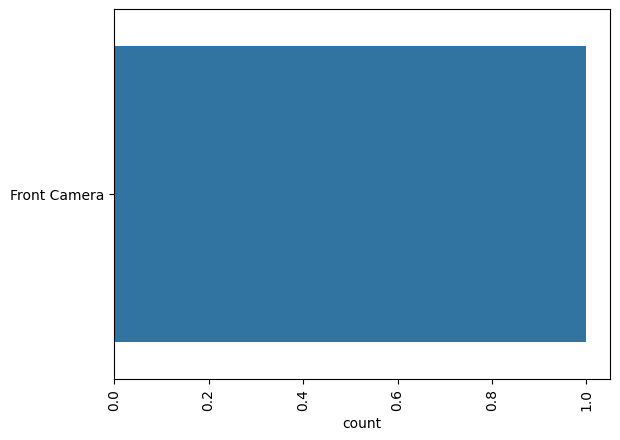

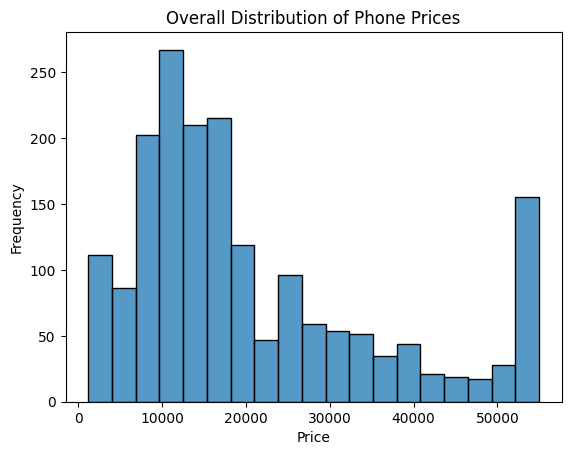

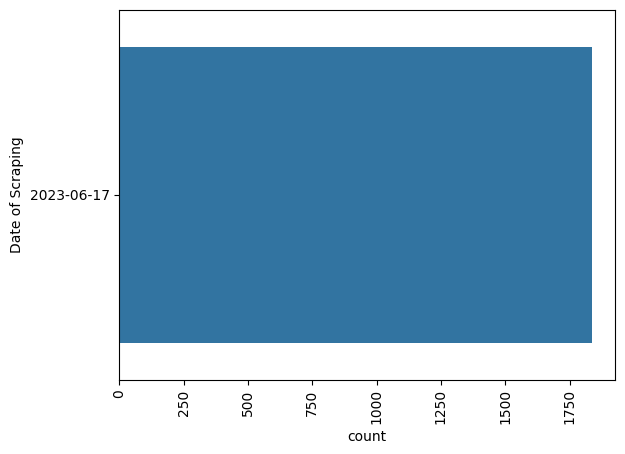

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Load your data
# data = pd.read_csv('your_dataset.csv')

# 1. Most common phone names
common_phone_names = mobile_prices_2023_csv_df['Brand'].value_counts().head(10)
print("Most common phone names:\n", common_phone_names)

# 2. Distribution of ratings
sns.histplot(mobile_prices_2023_csv_df['Rating ?/5'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# 3. Range of number of ratings
rating_range = mobile_prices_2023_csv_df['Number of Ratings'].max() - mobile_prices_2023_csv_df['Number of Ratings'].min()
print("Range of Number of Ratings:", rating_range)

# 4. Different RAM sizes
ram_sizes = mobile_prices_2023_csv_df['RAM'].unique()
print("Different RAM sizes:", ram_sizes)

# 5. Different storage capacities
storage_sizes = mobile_prices_2023_csv_df['ROM'].unique()
print("Different storage capacities:", storage_sizes)

# 6. Common back camera specifications
common_back_camera = mobile_prices_2023_csv_df['Rare Camera'].value_counts().head(10)
print("Most common back camera specifications:\n", common_back_camera)

# 7. Distribution of front camera specifications
sns.countplot(['Front Camera'])
plt.xticks(rotation=90)
plt.show()




# 10. Overall distribution of phone prices
sns.histplot(mobile_prices_2023_csv_df['Price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Overall Distribution of Phone Prices')
plt.show()

# 11. Distribution across scraping dates
sns.countplot(mobile_prices_2023_csv_df['Date of Scraping'])
plt.xticks(rotation=90)
plt.show()



Most common phone names:
 Brand
APPLE iPhone 14             16
APPLE iPhone 14 Plus        14
APPLE iPhone 13             13
realme GT Master Edition    12
APPLE iPhone 14 Pro         11
realme C55                  11
APPLE iPhone SE 3rd Gen     11
OnePlus 10R 5G              11
APPLE iPhone 12             10
vivo Y16                    10
Name: count, dtype: int64


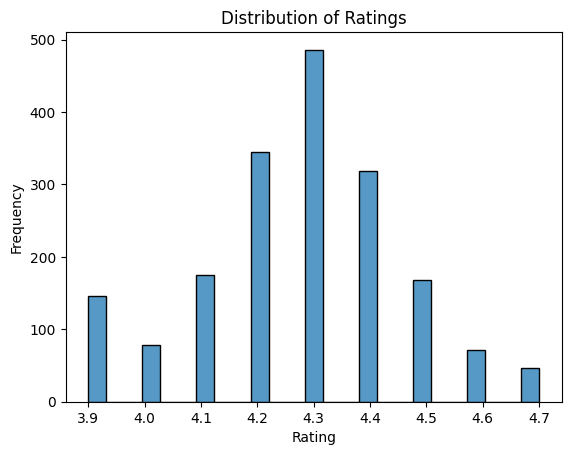

Range of Number of Ratings: 101768.0
Different RAM sizes: [ 2.  4.  6.  3.  8. 12.  0. 14.  1.]


In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Load your data
# data = pd.read_csv('your_dataset.csv')

# 1. Most common phone names
common_phone_names = mobile_prices_2023_csv_df['Brand'].value_counts().head(10)
print("Most common phone names:\n", common_phone_names)

# 2. Distribution of ratings
sns.histplot(mobile_prices_2023_csv_df['Rating ?/5'])
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# 3. Range of number of ratings (convert to numeric type)
mobile_prices_2023_csv_df['Number of Ratings'] = pd.to_numeric(mobile_prices_2023_csv_df['Number of Ratings'], errors='coerce')
rating_range = mobile_prices_2023_csv_df['Number of Ratings'].max() - mobile_prices_2023_csv_df['Number of Ratings'].min()
print("Range of Number of Ratings:", rating_range)

# 4. Different RAM sizes
ram_sizes = mobile_prices_2023_csv_df['RAM'].unique()
print("Different RAM sizes:", ram_sizes)

# ... (continue with the rest of the questions)


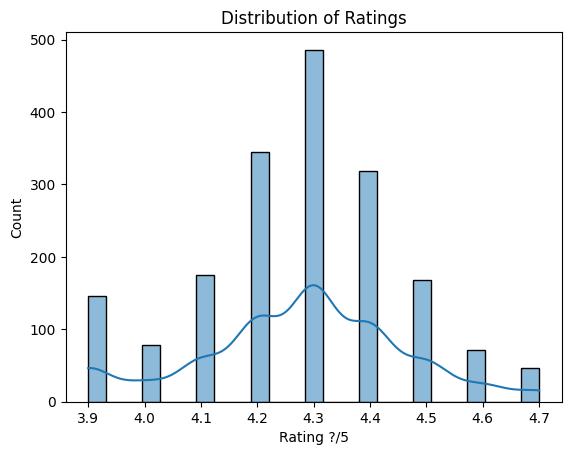

In [84]:
sns.histplot(mobile_prices_2023_csv_df['Rating ?/5'], kde=True)
plt.title('Distribution of Ratings')
plt.show()

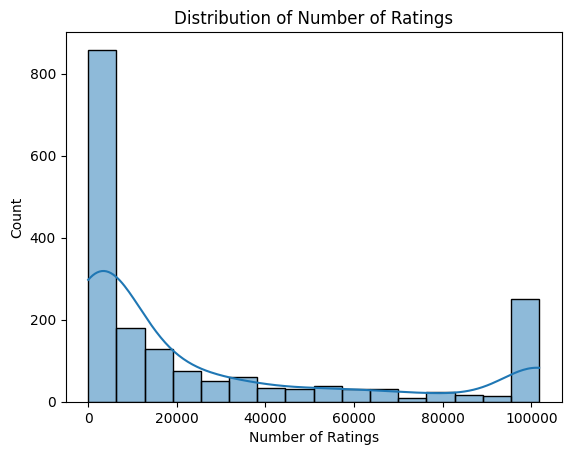

In [85]:
sns.histplot(mobile_prices_2023_csv_df['Number of Ratings'], kde=True)
plt.title('Distribution of Number of Ratings')
plt.show()

15 question

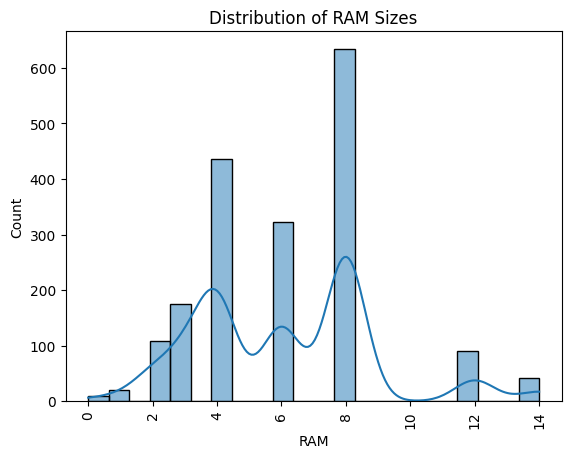

In [86]:
sns.histplot(mobile_prices_2023_csv_df['RAM'], kde=True)
plt.title('Distribution of RAM Sizes')
plt.xticks(rotation=90)
plt.show()

10 question

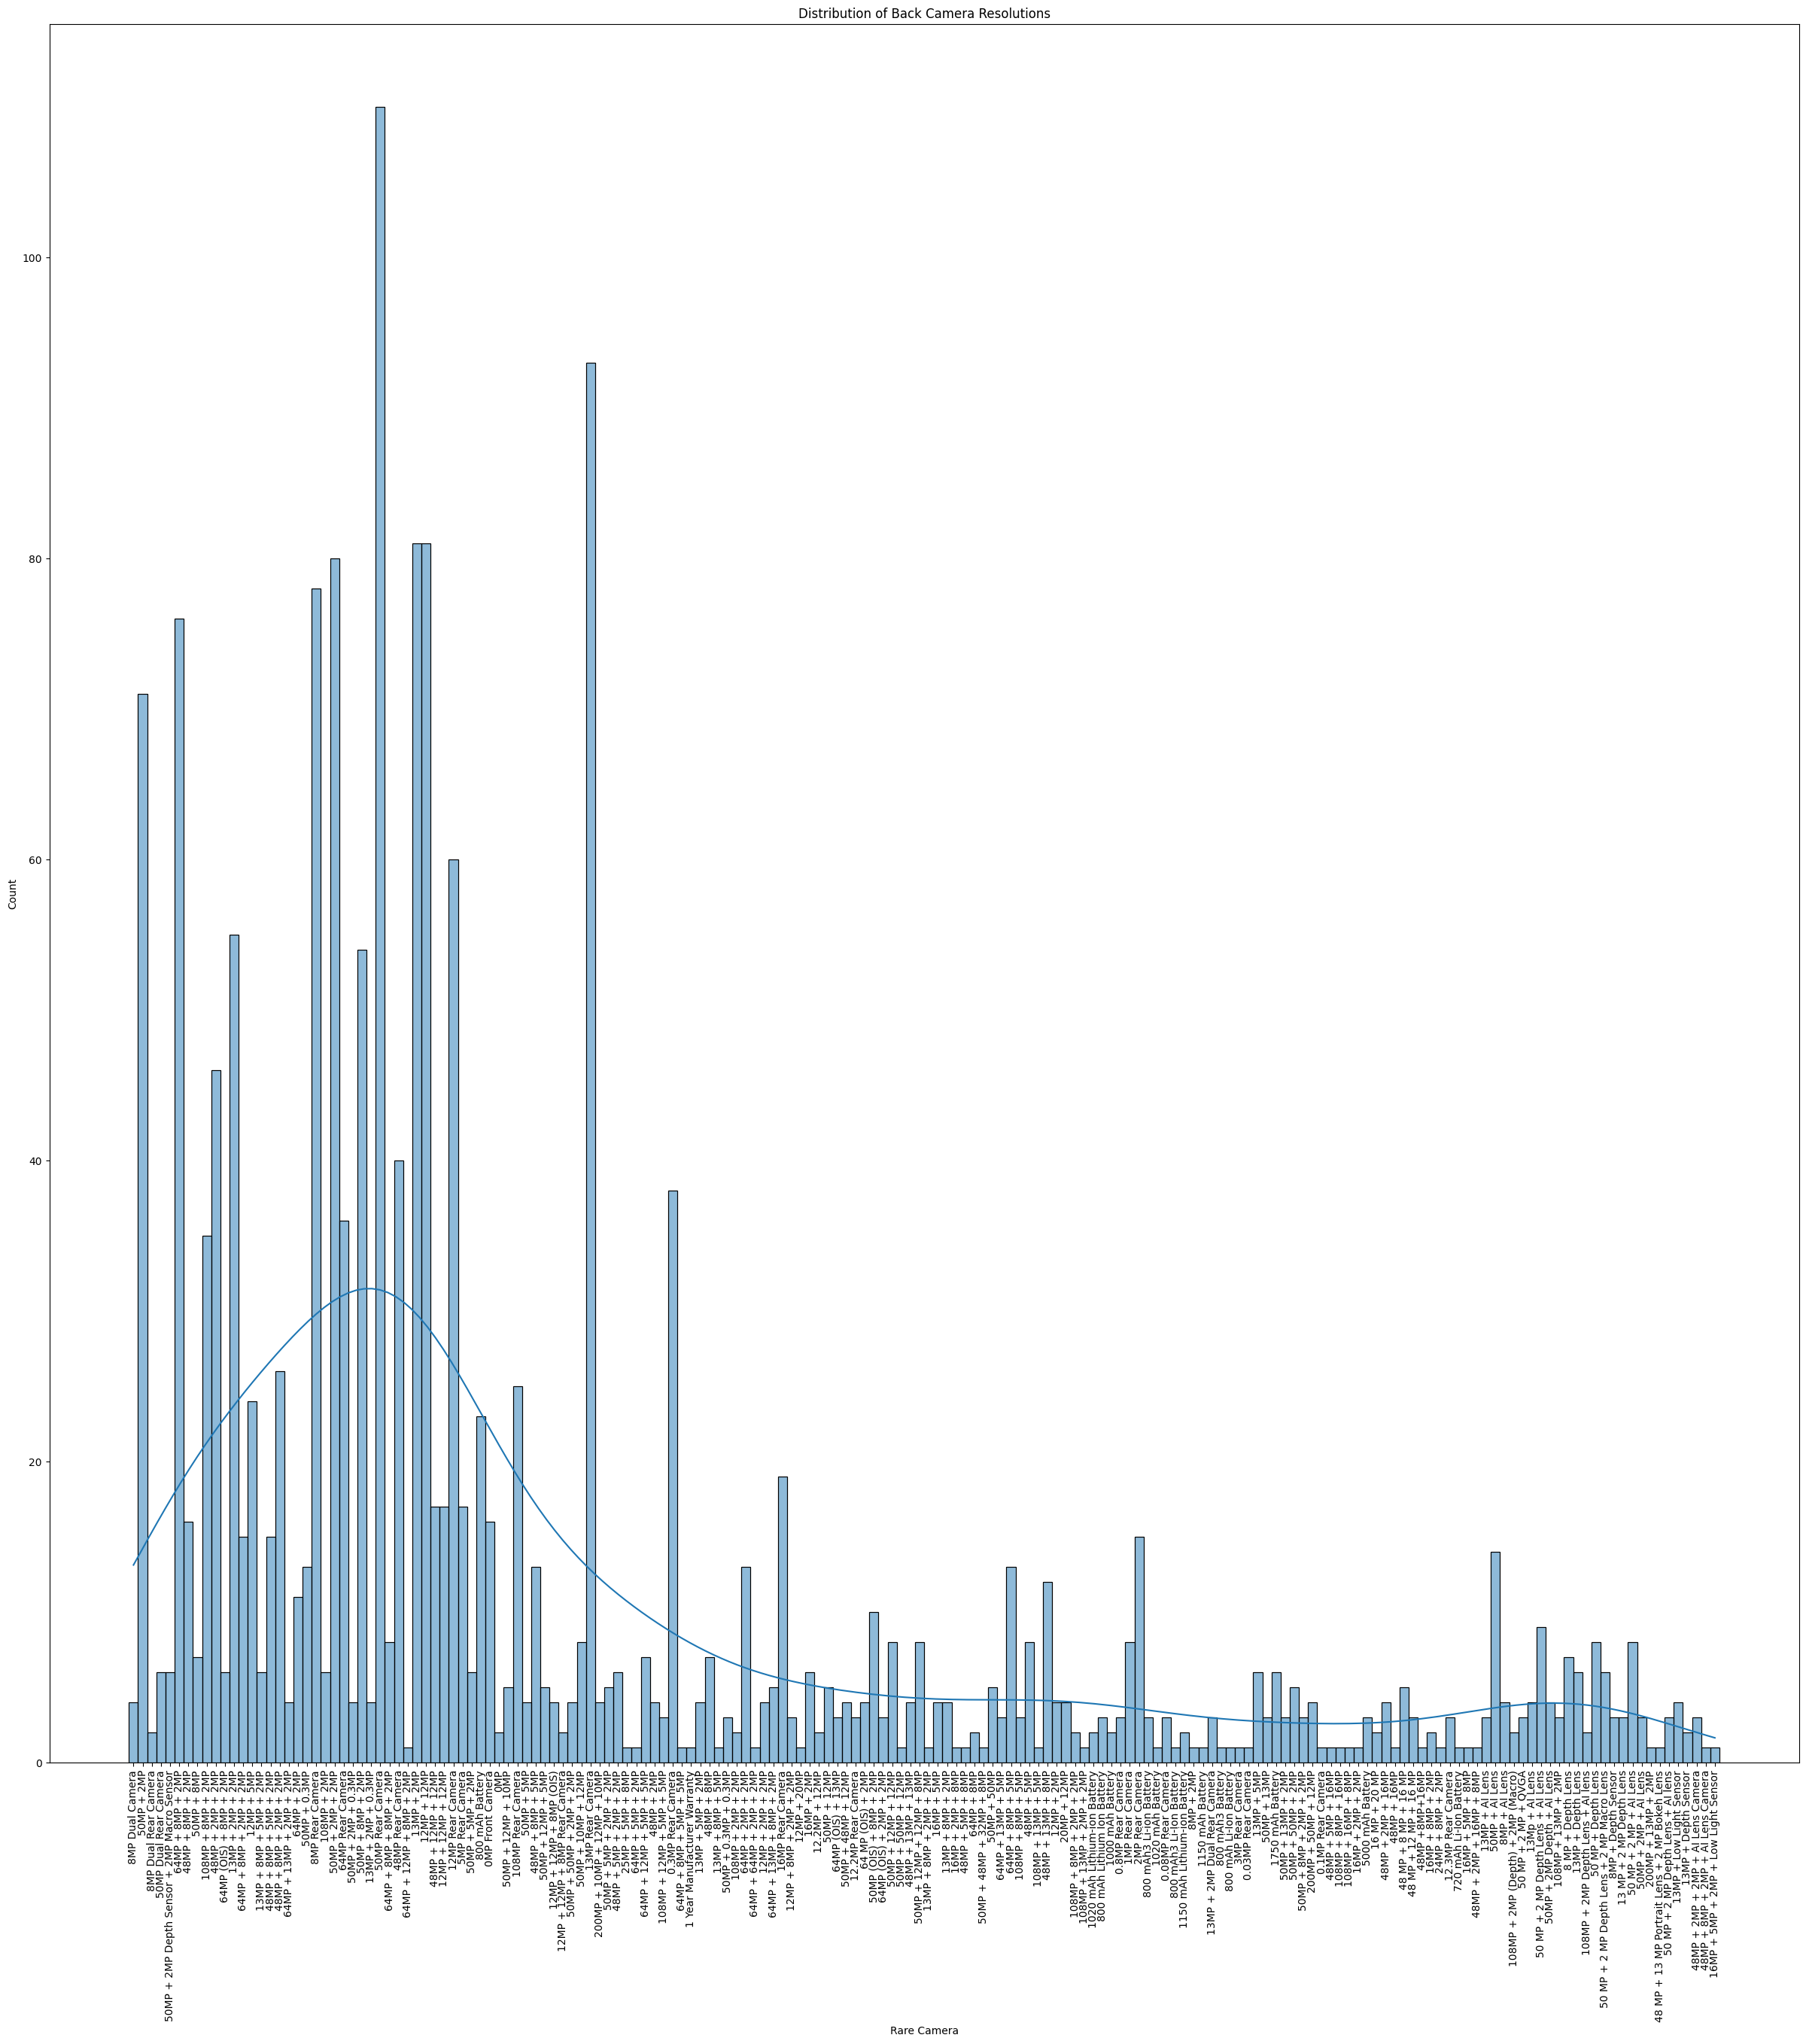

In [87]:
plt.figure(figsize=(30,30))
sns.histplot(mobile_prices_2023_csv_df['Rare Camera'], kde=True)
plt.title('Distribution of Back Camera Resolutions')
plt.xticks(rotation=90,fontsize=10)
plt.show()

11 question

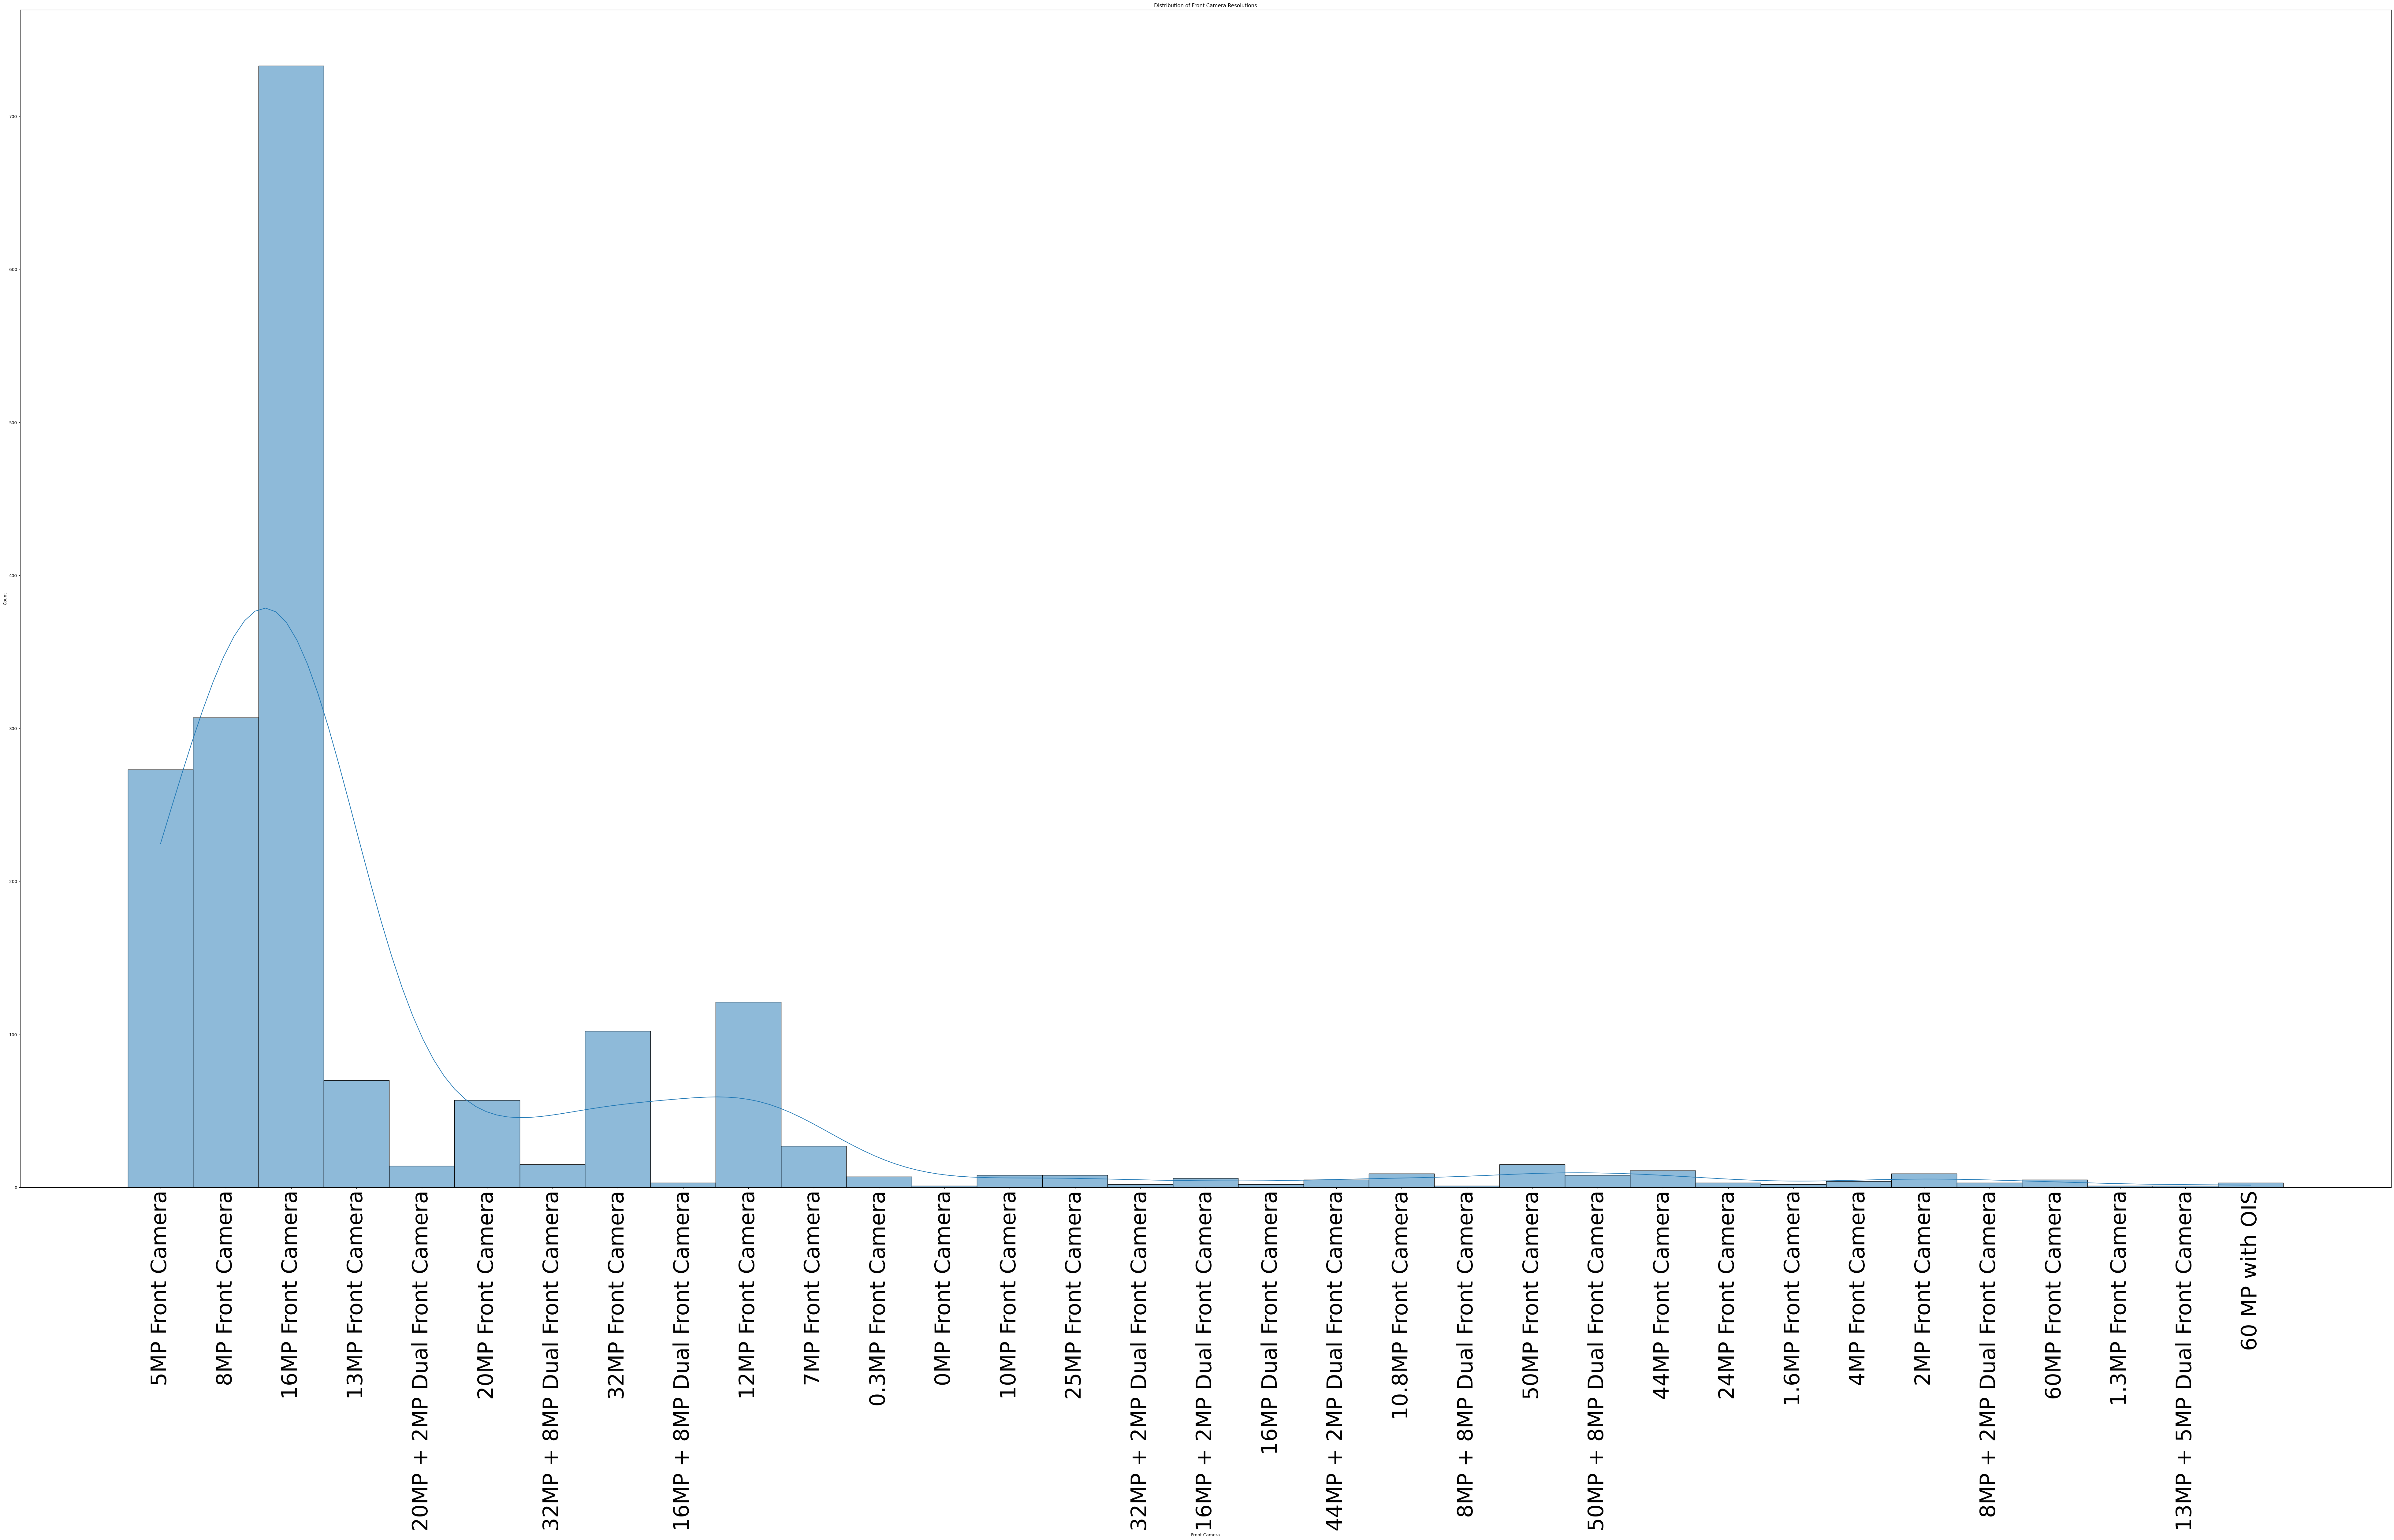

In [88]:
plt.figure(figsize=(100,50))
sns.histplot(mobile_prices_2023_csv_df['Front Camera'], kde=True)
plt.title('Distribution of Front Camera Resolutions')
plt.xticks(rotation=90)
plt.xticks(fontsize=50)
plt.show()

18 question

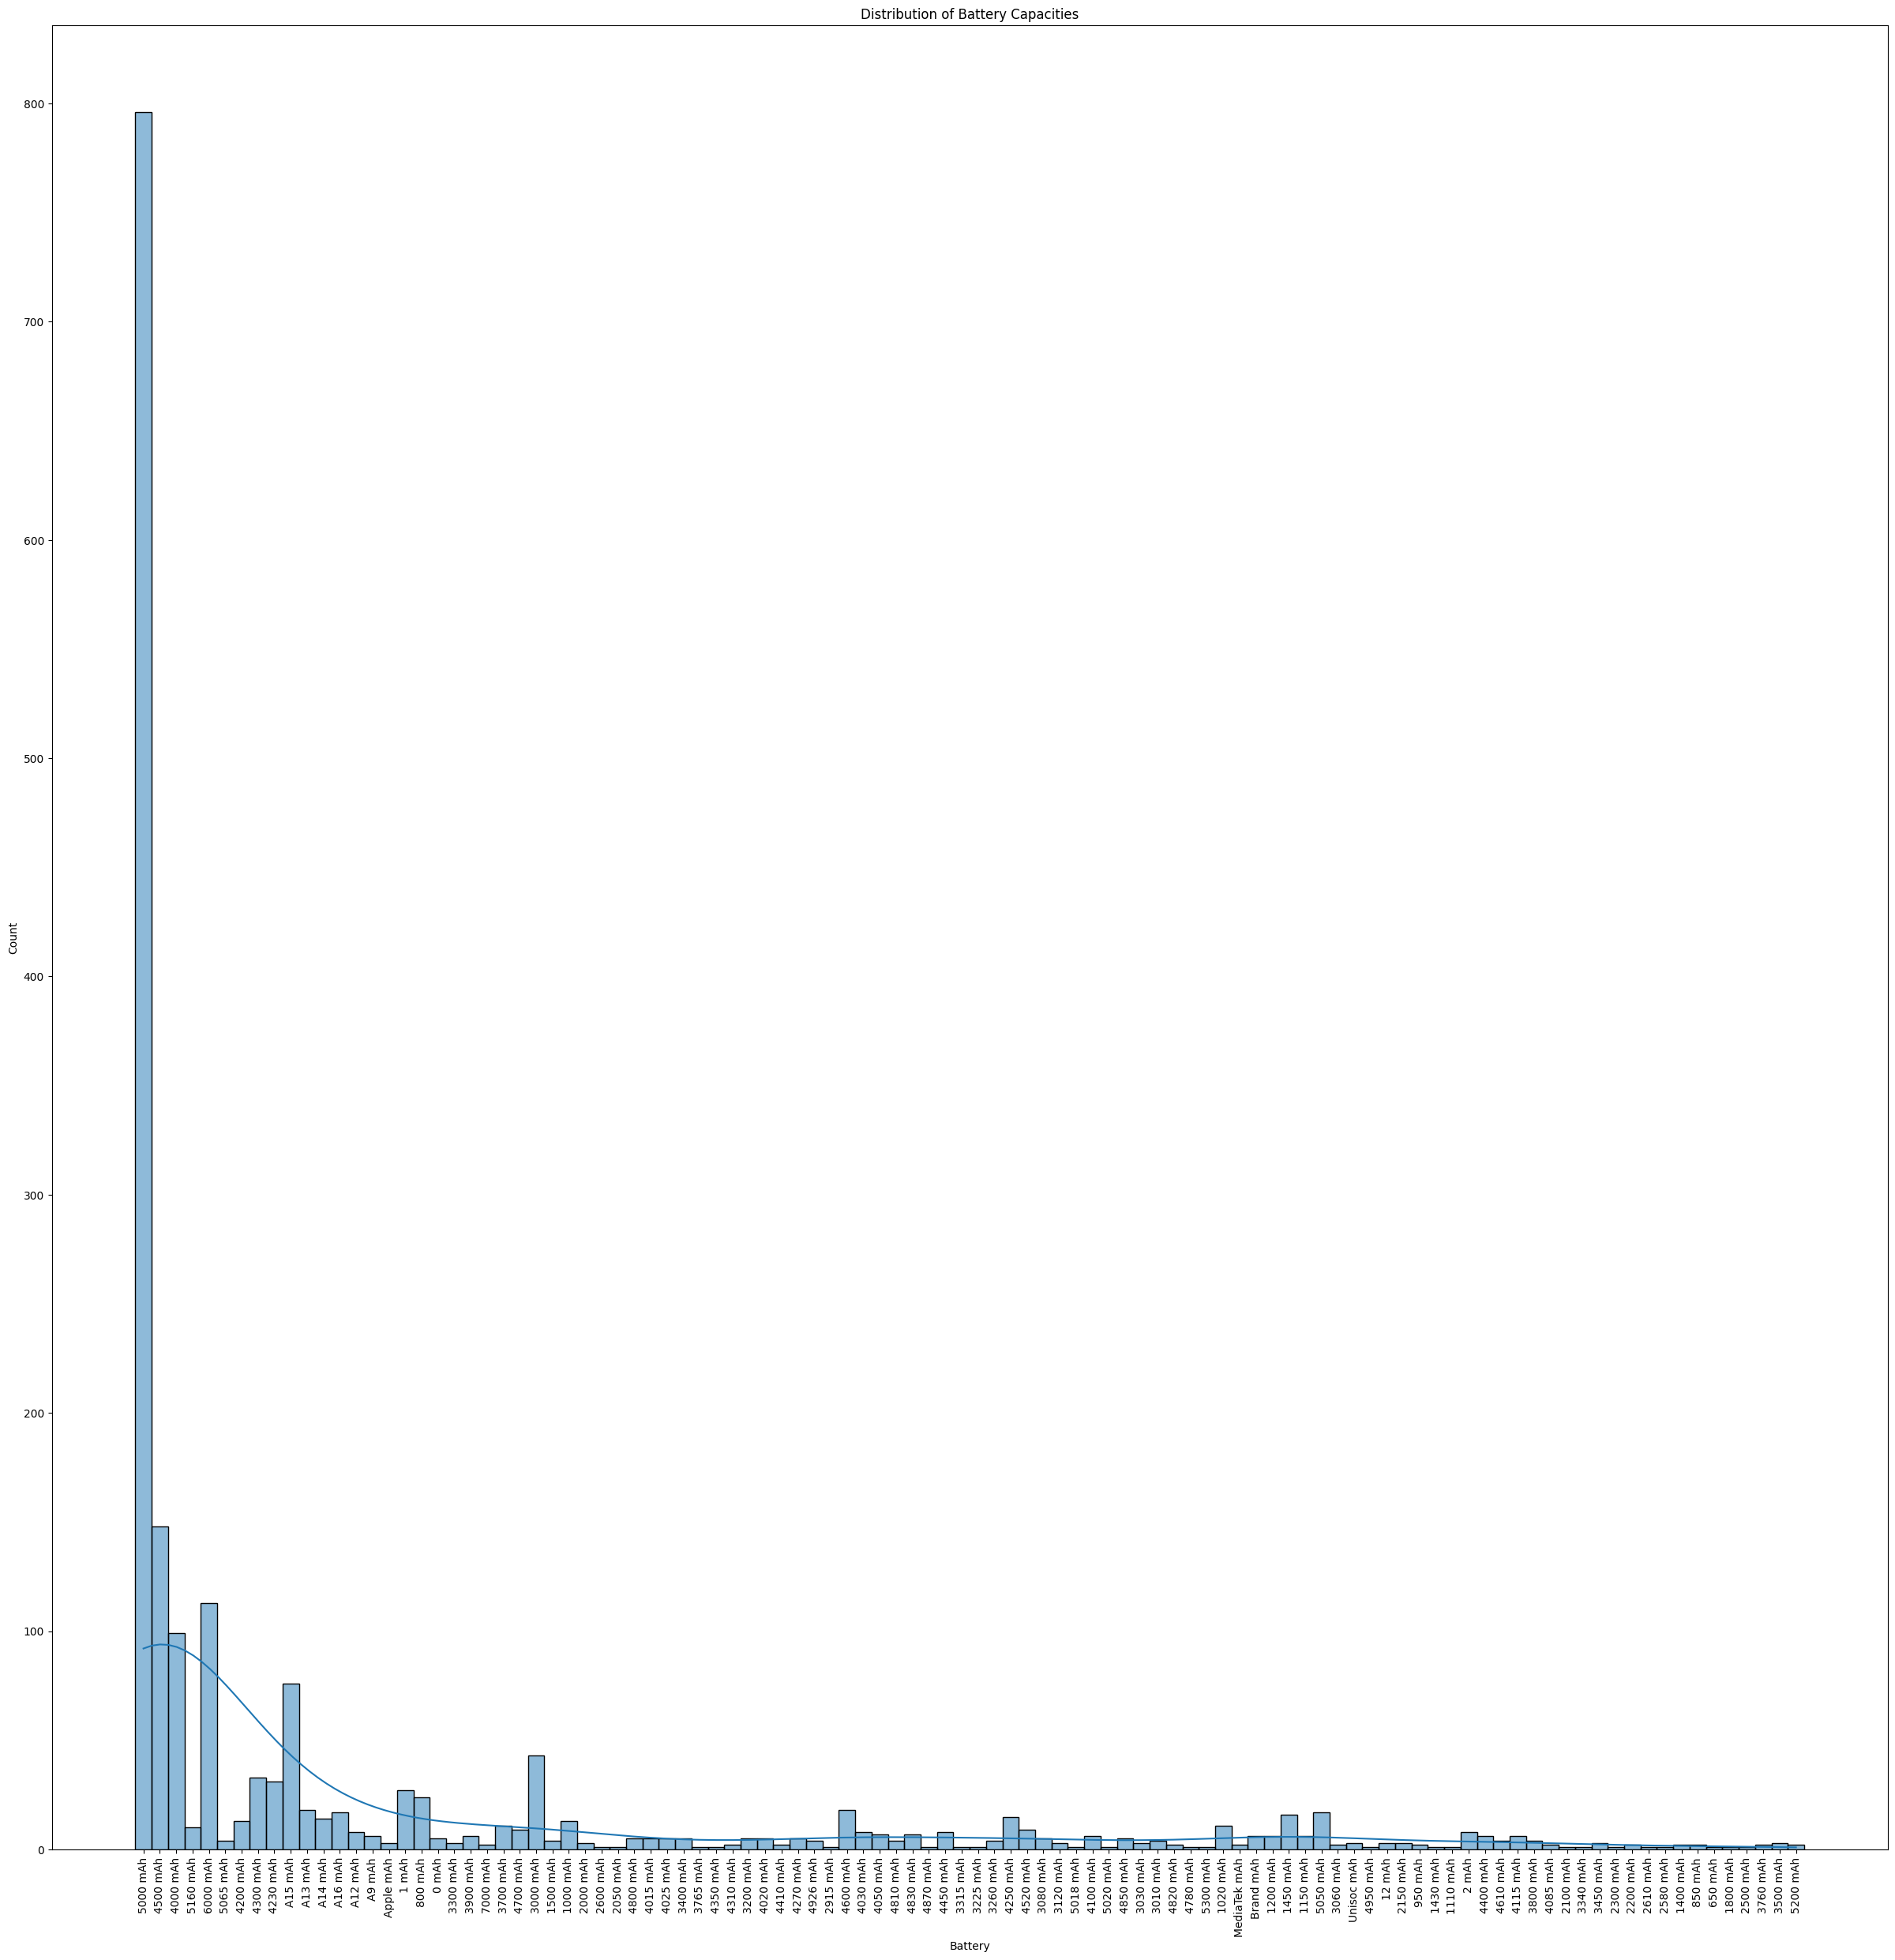

In [89]:
plt.figure(figsize=(30,30))
sns.histplot(mobile_prices_2023_csv_df['Battery'], kde=True)
plt.title('Distribution of Battery Capacities')
plt.xticks(rotation=90)
plt.show()

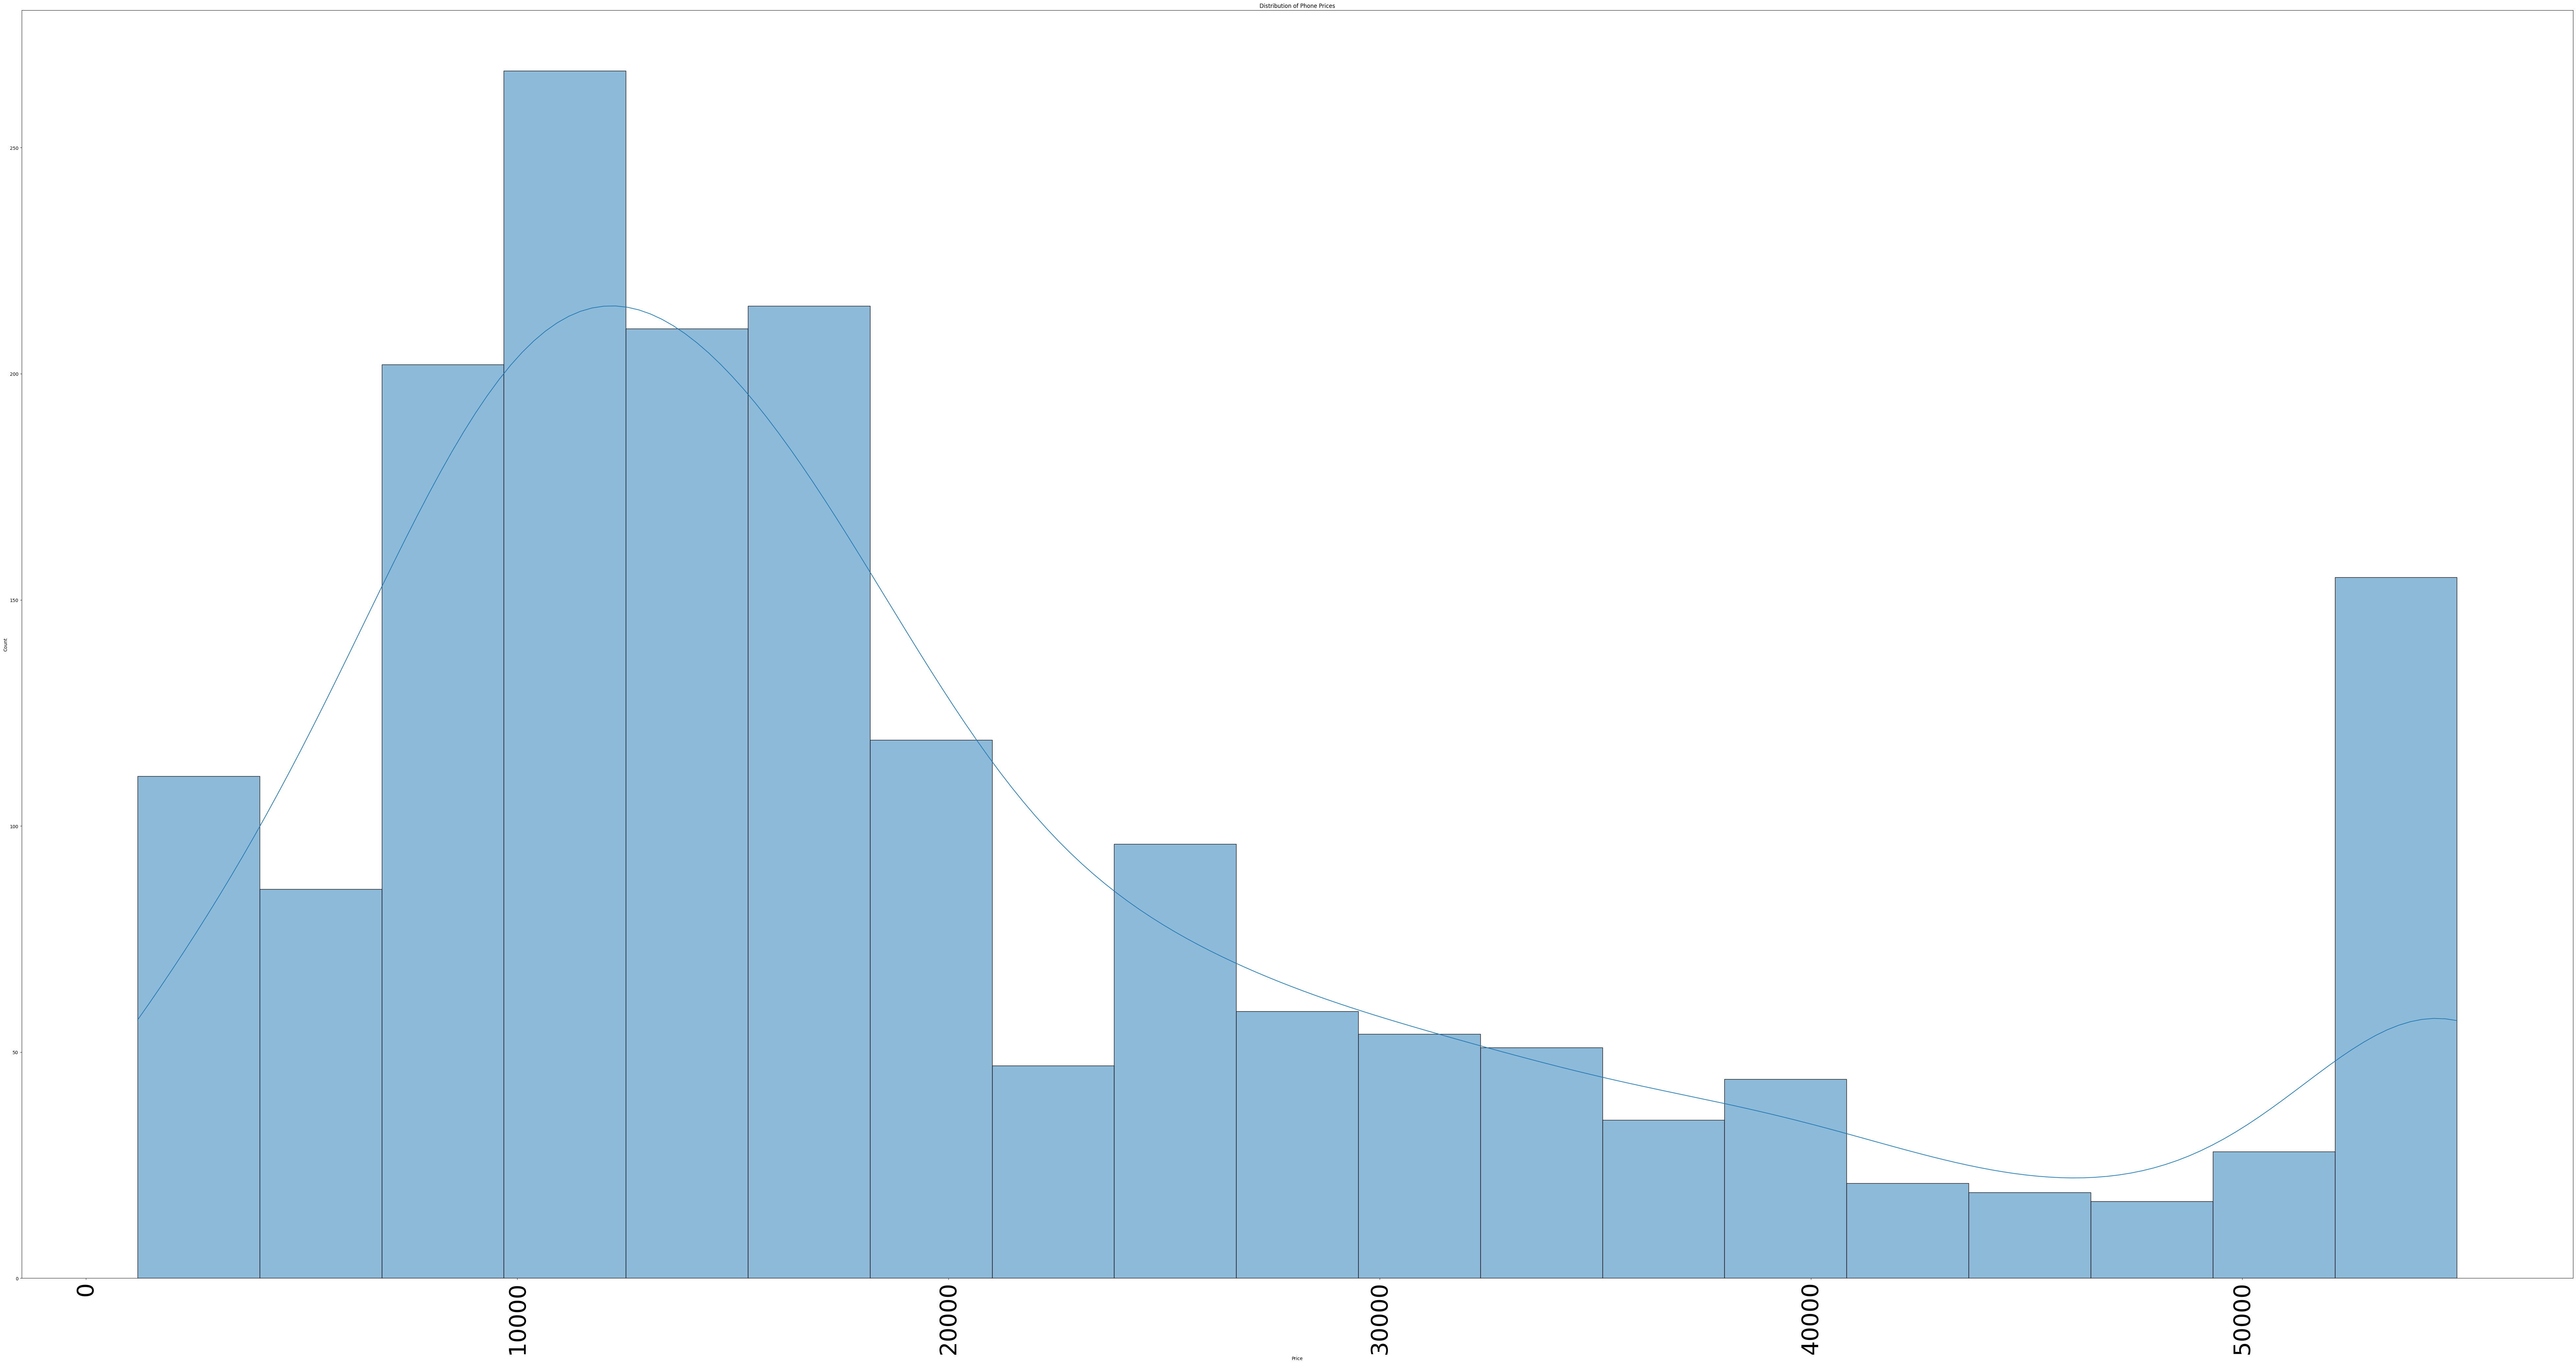

In [90]:
plt.figure(figsize=(100,50))

sns.histplot(mobile_prices_2023_csv_df['Price'], kde=True)
plt.title('Distribution of Phone Prices')
plt.xticks(rotation=90)
plt.xticks(fontsize=50)
plt.show()

4 question

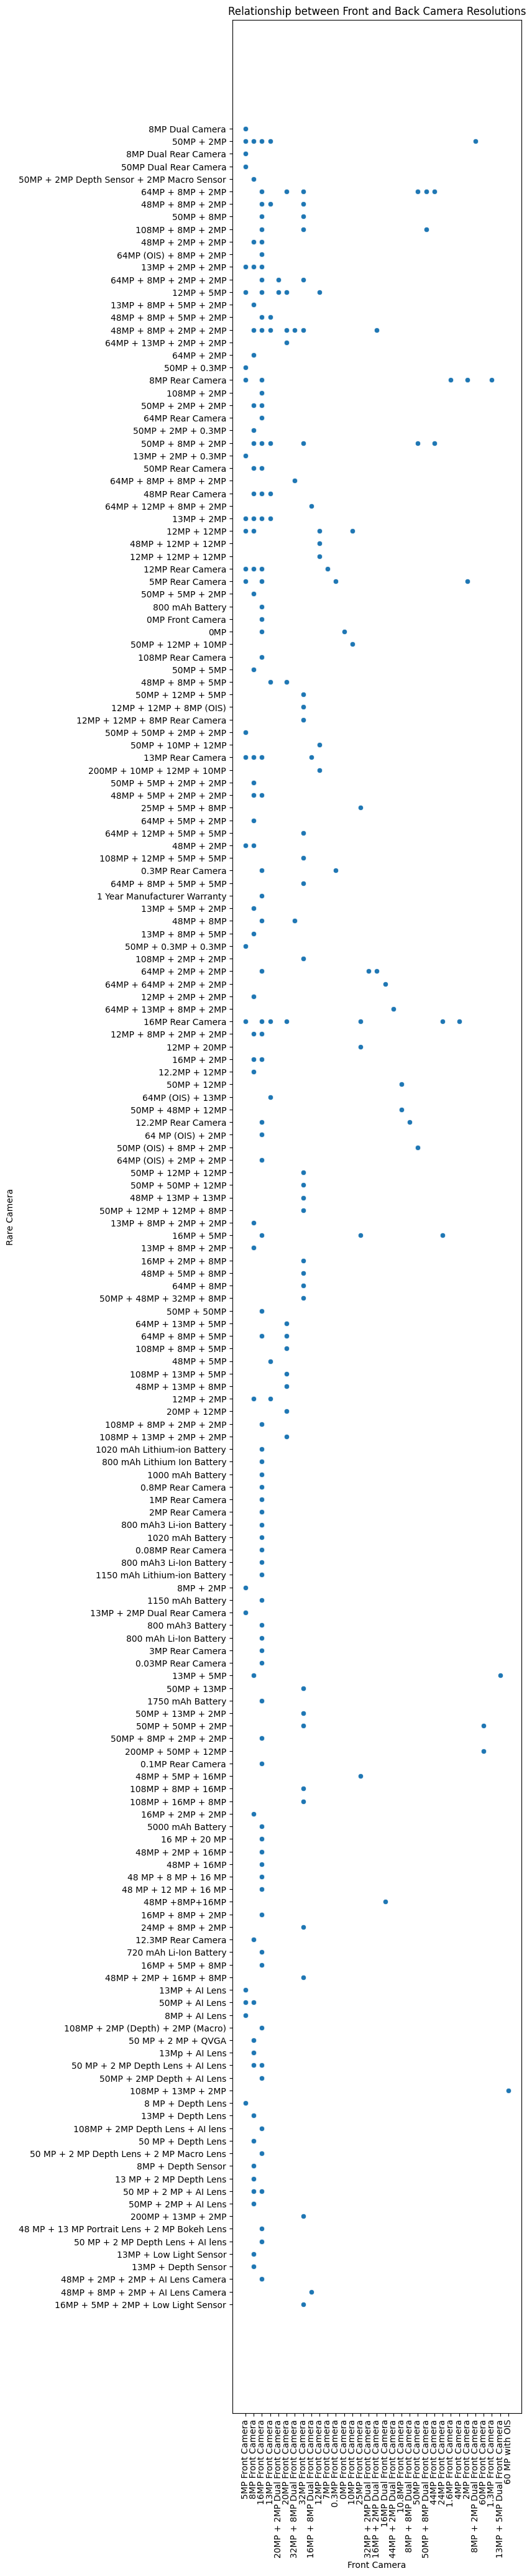

In [91]:
plt.figure(figsize=(6,50))
sns.scatterplot(x='Front Camera', y='Rare Camera', data=mobile_prices_2023_csv_df)
plt.title('Relationship between Front and Back Camera Resolutions')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

6 question

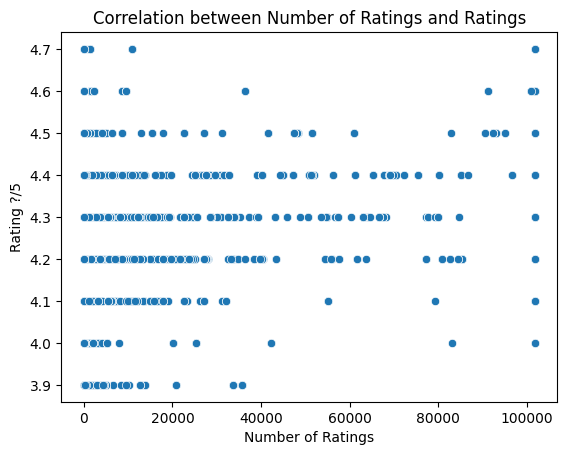

In [92]:
sns.scatterplot(x='Number of Ratings', y='Rating ?/5', data=mobile_prices_2023_csv_df)
plt.title('Correlation between Number of Ratings and Ratings')
plt.show()


7 question

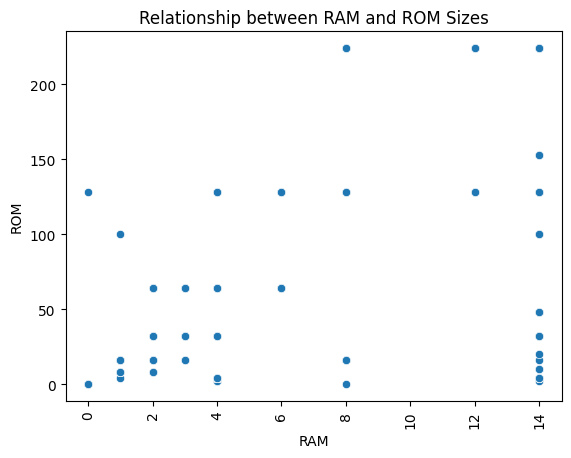

In [93]:
sns.scatterplot(x='RAM', y='ROM', data=mobile_prices_2023_csv_df)
plt.title('Relationship between RAM and ROM Sizes')
plt.xticks(rotation=90)
plt.show()